# **Spotify Song & Genre Analysis, Popularity Prediction and Building a Simple Recommendation System - Group 61**

**Group Members:**

Berke Turanlıoğlu (28442)

Doruk Can Metiner (28271)

# Introduction

Welcome to our project about analyzing Spotify Data. 

In the exploratory data analysis, first we analyzed the features of the whole data, commenting on our findings afterwards. Later on, we compared the features with each other and also throughout the years. Afterwards, we continued with the analysis of the 1000 most popular tracks and comparison of their features with the whole data. We continued with the popularity changes of genres over time and the temporal analysis of the features of the most popular genres. We concluded this step of our project with the analysis of post-COVID track features. We continued with the hypothesis testing step after exploratory data analysis. We made tests on our data to see the effect of features on the popularity of the songs and if significant differences exist between different eras. Lastly, in the machine learning part, first we used linear regression models in order to predict the popularity of a song. We continued with hyper-parameter tuning to increase the effectiveness. We used random forest and decision tree models to model our data and aimed to reach the maximum accuracy. We concluded our project by developing a simple song recommendation system, accepting a list of songs as an input and returning 3 similar songs for each entered song.

In [ ]:
from google.colab import drive
drive.mount("./drive/", force_remount=True)

Mounted at ./drive/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbr
import plotly.express as px #Interactive Plots
from os.path import join
from scipy import stats

# to disable warning outputs
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

path_prefix = "./drive/My Drive"
fname = "data.csv"
df = pd.read_csv(join(path_prefix, fname))
fname_2 = "data_by_year_o.csv"
df_byYear = pd.read_csv(join(path_prefix, fname_2))
fname_3 = "data_w_genres_o.csv"
df_genres = pd.read_csv(join(path_prefix, fname_3))

df.head()

acousticness                    artists  ...  valence  year
0      0.991000            ['Mamie Smith']  ...   0.6340  1920
1      0.643000  ["Screamin' Jay Hawkins"]  ...   0.9500  1920
2      0.993000            ['Mamie Smith']  ...   0.6890  1920
3      0.000173        ['Oscar Velazquez']  ...   0.0422  1920
4      0.295000                   ['Mixe']  ...   0.2990  1920

[5 rows x 19 columns]

# Exploratory Data Analysis

Starting with the exploratory data analysis of our protect, we analyzed the whole data from the aspect of the parameters given in the table and displayed the mean value for each parameter. In the graphs below, we analyzed the data for each column provided within the raw data, choosing appropriate graph types and tried to generalize the parametrics of the tracks. We commented on our findings for each graph.


### Visualizations Descriptive Statistics

In [ ]:
df.describe() # statistical details of our data

acousticness   danceability  ...        valence           year
count  174389.000000  174389.000000  ...  174389.000000  174389.000000
mean        0.499228       0.536758  ...       0.524533    1977.061764
std         0.379936       0.176025  ...       0.264477      26.907950
min         0.000000       0.000000  ...       0.000000    1920.000000
25%         0.087700       0.414000  ...       0.311000    1955.000000
50%         0.517000       0.548000  ...       0.536000    1977.000000
75%         0.895000       0.669000  ...       0.743000    1999.000000
max         0.996000       0.988000  ...       1.000000    2021.000000

[8 rows x 15 columns]

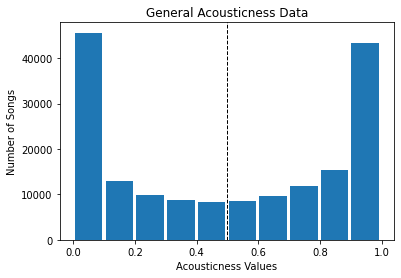

Mean value for acousticness: 
0.499


In [ ]:
plt.hist(df["acousticness"], bins=10, rwidth=0.9)
m = df["acousticness"].mean()
plt.axvline(m, color='k', linestyle='dashed', linewidth=1)
plt.xlabel("Acousticness Values")
plt.ylabel("Number of Songs")
plt.title("General Acousticness Data")
plt.show()
print("Mean value for acousticness: ")
print(round(m,3))

After graphing the acousticness of the tracks, we saw that a most of the tracks are either acoustic or not, which was a predictable result for us. However, the overall data shows that the number of tracks that are not acustic at all are higher than the ones that are acustic. This shows that technology surpassed naturality.

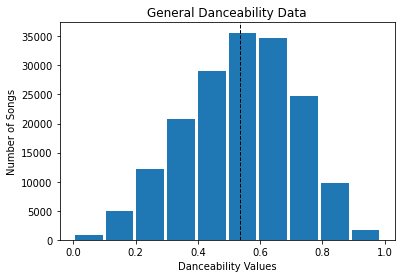

Mean value for danceability: 
0.537


In [ ]:
plt.hist(df["danceability"], bins=10,rwidth=0.9)
m = df["danceability"].mean()
plt.axvline(m, color='k', linestyle='dashed', linewidth=1)
plt.xlabel("Danceability Values")
plt.ylabel("Number of Songs")
plt.title("General Danceability Data")
plt.show()
print("Mean value for danceability: ")
print(round(m,3))

After analyzing danceability data for all tracks, the graph looked like a normal distribution unlike acousticness. Supporting our claim above, the mean showed up to be around 0.5, also stating that the distribution is close to a normal distribution. Therefore, one can state that there is an option for every mood.

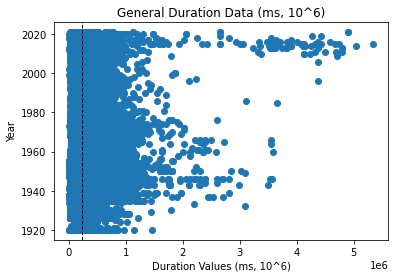

Mean value for duration (in min): 
3.88


In [ ]:
plt.scatter(df["duration_ms"], df["year"])
m = df["duration_ms"].mean()
plt.axvline(m, color='k', linestyle='dashed', linewidth=1)
plt.xlabel("Duration Values (ms, 10^6)")
plt.ylabel("Year")
plt.title("General Duration Data (ms, 10^6)")
plt.show()
print("Mean value for duration (in min): ")
m = m/60000
print(round(m,3))

This time, unlike both acousticness and danceability, a histogram looked inefficient due to not clearly showing outliers. As a result, we decided that a scatterplot would look better instead. After generating the scatterplot, the first significant aspect we noticed was the durations of the song increasing after 2010's. We observed a similar trend starting at late 1930's and lasting until 1960's. The trend of increasing song duration can be related to moments of crisis across the world.

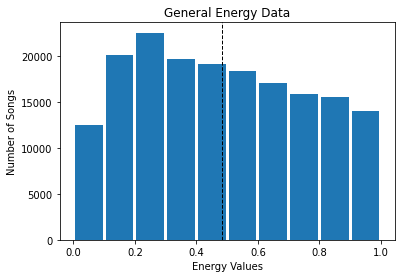

Mean value for energy: 
0.483


In [ ]:
plt.hist(df["energy"], bins=10, rwidth=0.9)
m = df["energy"].mean()
plt.axvline(m, color='k', linestyle='dashed', linewidth=1)
plt.xlabel("Energy Values")
plt.ylabel("Number of Songs")
plt.title("General Energy Data")
plt.show()
print("Mean value for energy: ")
print(round(m,3))

When it comes to energy parameter of the tracks, we observed that the distribution of the tracks are more like an equal distribution with a mean value slightly below 0.5. However, one can also say that the majority of the tracks on Spotify share a below-the-average energy value.

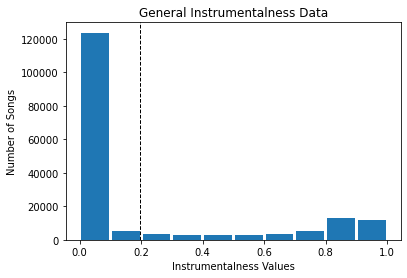

Mean value for instrumentalness: 
0.197


In [ ]:
plt.hist(df["instrumentalness"], bins=10, rwidth=0.9)
m = df["instrumentalness"].mean()
plt.axvline(m, color='k', linestyle='dashed', linewidth=1)
plt.xlabel("Instrumentalness Values")
plt.ylabel("Number of Songs")
plt.title("General Instrumentalness Data")
plt.show()
print("Mean value for instrumentalness: ")
print(round(m,3))

Continuing with instrumentalness, as we were expecting, a track is either instrumental or not instrumental with very low number of tracks in between. However, non-instrumental tracks are the vast majority of the track archive on Spotify, indicating that both producers and listeners are choosing electronic music over instrumental music.

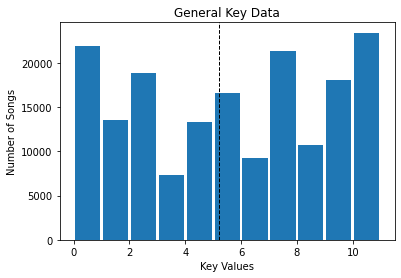

Mean value for key: 
5.205


In [ ]:
plt.hist(df["key"], bins=11, rwidth=0.9)
m = df["key"].mean()
plt.axvline(m, color='k', linestyle='dashed', linewidth=1)
plt.xlabel("Key Values")
plt.ylabel("Number of Songs")
plt.title("General Key Data")
plt.show()
print("Mean value for key: ")
print(round(m,3))

Key in music was a new concept for us as well. To start with a brief definition, we learned that key in music means the main group of pitches or notes forming the harmonic foundation of the song. There are 12 tones serving as a key in music. When it comes to our data, we saw that the most entry belongs to 12 keys, indicating that these songs avoid being monotone. However, contrastingly the second most entry belongs to 1 key, this time meaning a monotone harmony. From this graph, we concluded that people either choose variation and change in music or stable songs.

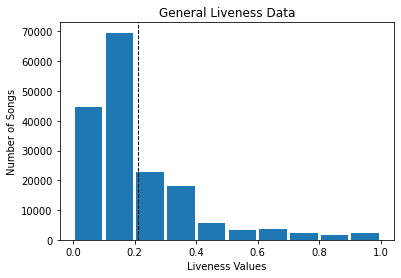

Mean value for liveness: 
0.211


In [ ]:
plt.hist(df["liveness"], bins=10, rwidth=0.9)
m = df["liveness"].mean()
plt.axvline(m, color='k', linestyle='dashed', linewidth=1)
plt.xlabel("Liveness Values")
plt.ylabel("Number of Songs")
plt.title("General Liveness Data")
plt.show()
print("Mean value for liveness: ")
print(round(m,3))

When it comes to liveness of the tracks in Spotify, the common trend states that people are choosing to listen lively songs, with a mean liveness value of 0.2. This is actually a good thing for us, believing that music can help people psychology in many ways.

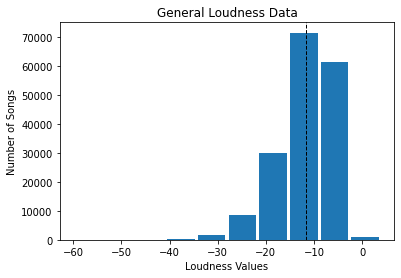

Mean value for loudness: 
-11.751


In [ ]:
plt.hist(df["loudness"], bins=10, rwidth=0.9)
m = df["loudness"].mean()
plt.axvline(m, color='k', linestyle='dashed', linewidth=1)
plt.xlabel("Loudness Values")
plt.ylabel("Number of Songs")
plt.title("General Loudness Data")
plt.show()
print("Mean value for loudness: ")
print(round(m,3))

Histogram of the loudness value is one of the most one-of-a-kind histograms because of its look and shape. It looks like a normal distribution which is a bit narrower and shifted right. It increases exponentially until it reaches the mean value which is approx. -11. Then it rapidly falls into 0 when it reaches 0 also.

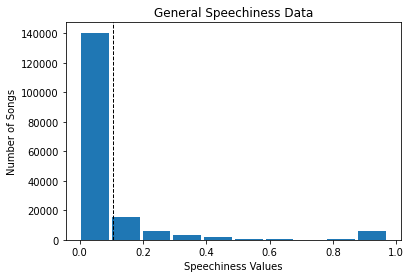

Mean value for speechiness: 
0.106


In [ ]:
plt.hist(df["speechiness"], bins=10, rwidth=0.9)
m = df["speechiness"].mean()
plt.axvline(m, color='k', linestyle='dashed', linewidth=1)
plt.xlabel("Speechiness Values")
plt.ylabel("Number of Songs")
plt.title("General Speechiness Data")
plt.show()
print("Mean value for speechiness: ")
print(round(m,3))

Presence of spoken words is very low surprisingly. So, as we can see from the histogram, 140 thousand of the songs are not lyrically rich. Their musical track is more important. The right-most short bar could belong to rap songs since they are mostly lyrical.

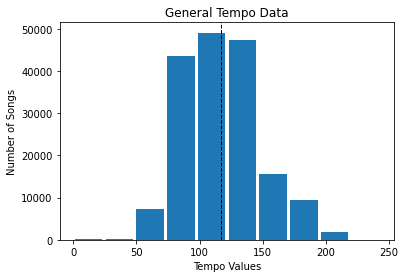

Mean value for tempo: 
117.006


In [ ]:
plt.hist(df["tempo"], bins=10, rwidth=0.9)
m = df["tempo"].mean()
plt.axvline(m, color='k', linestyle='dashed', linewidth=1)
plt.xlabel("Tempo Values")
plt.ylabel("Number of Songs")
plt.title("General Tempo Data")
plt.show()
print("Mean value for tempo: ")
print(round(m,3))

Tempo values of the songs are mostly agglomerated in the middle of the histogram. Almost all of the songs have at least 50 in terms of tempo value. Average bpm (beats per minute) of these songs is 117, as we can see with the vertical mean dashline.

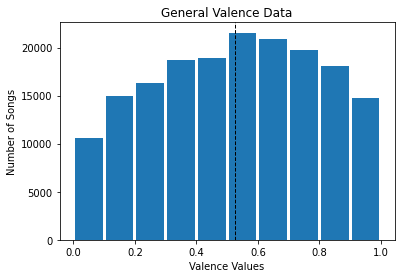

Mean value for valence: 
0.525


In [ ]:
plt.hist(df["valence"], bins=10, rwidth=0.9)
m = df["valence"].mean()
plt.axvline(m, color='k', linestyle='dashed', linewidth=1)
plt.xlabel("Valence Values")
plt.ylabel("Number of Songs")
plt.title("General Valence Data")
plt.show()
print("Mean value for valence: ")
print(round(m,3))

Valence of the songs among almost a century is not that divergent such as speechiness or liveness data. From 0 to 10, almost all valence values have hundreds of songs. However, there is a most of the songs have approx. 1 valence value.

### Visualizations of Aggregated Forms Based on Features

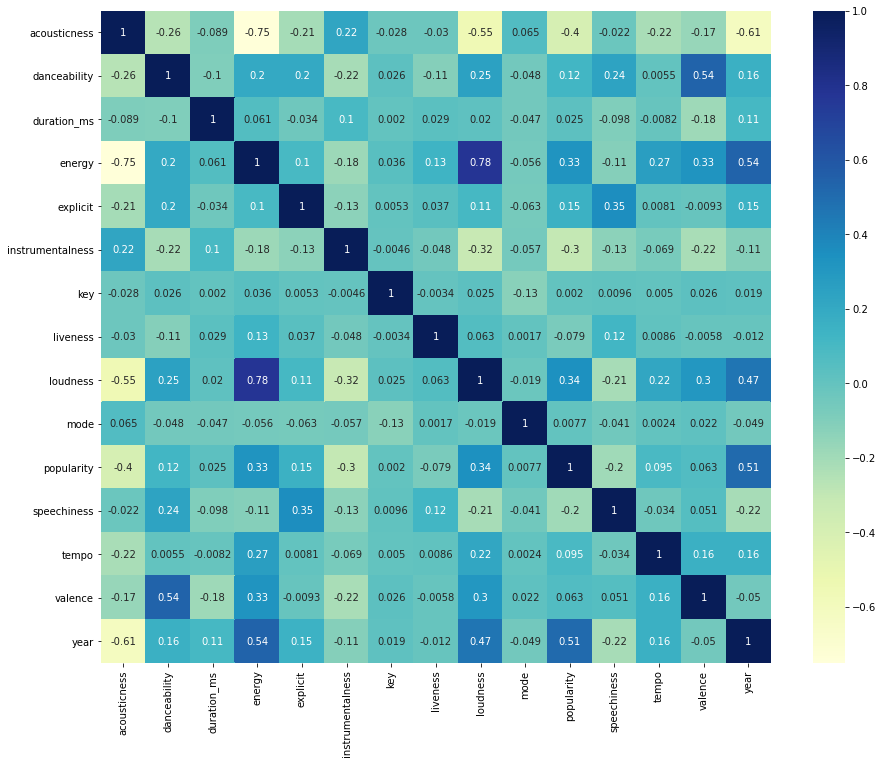

In [ ]:
# Correlation Matrix as a Heatmap for the features of the tracks
# Heatmap generated is the feature of seaborn, which is imported as sbr
from matplotlib import cm
plt.figure(figsize=(15,12))
corr = df.corr()
heat = sbr.heatmap(corr, xticklabels=corr.columns.values,
                  yticklabels=corr.columns.values,cmap=cm.YlGnBu,annot=True)

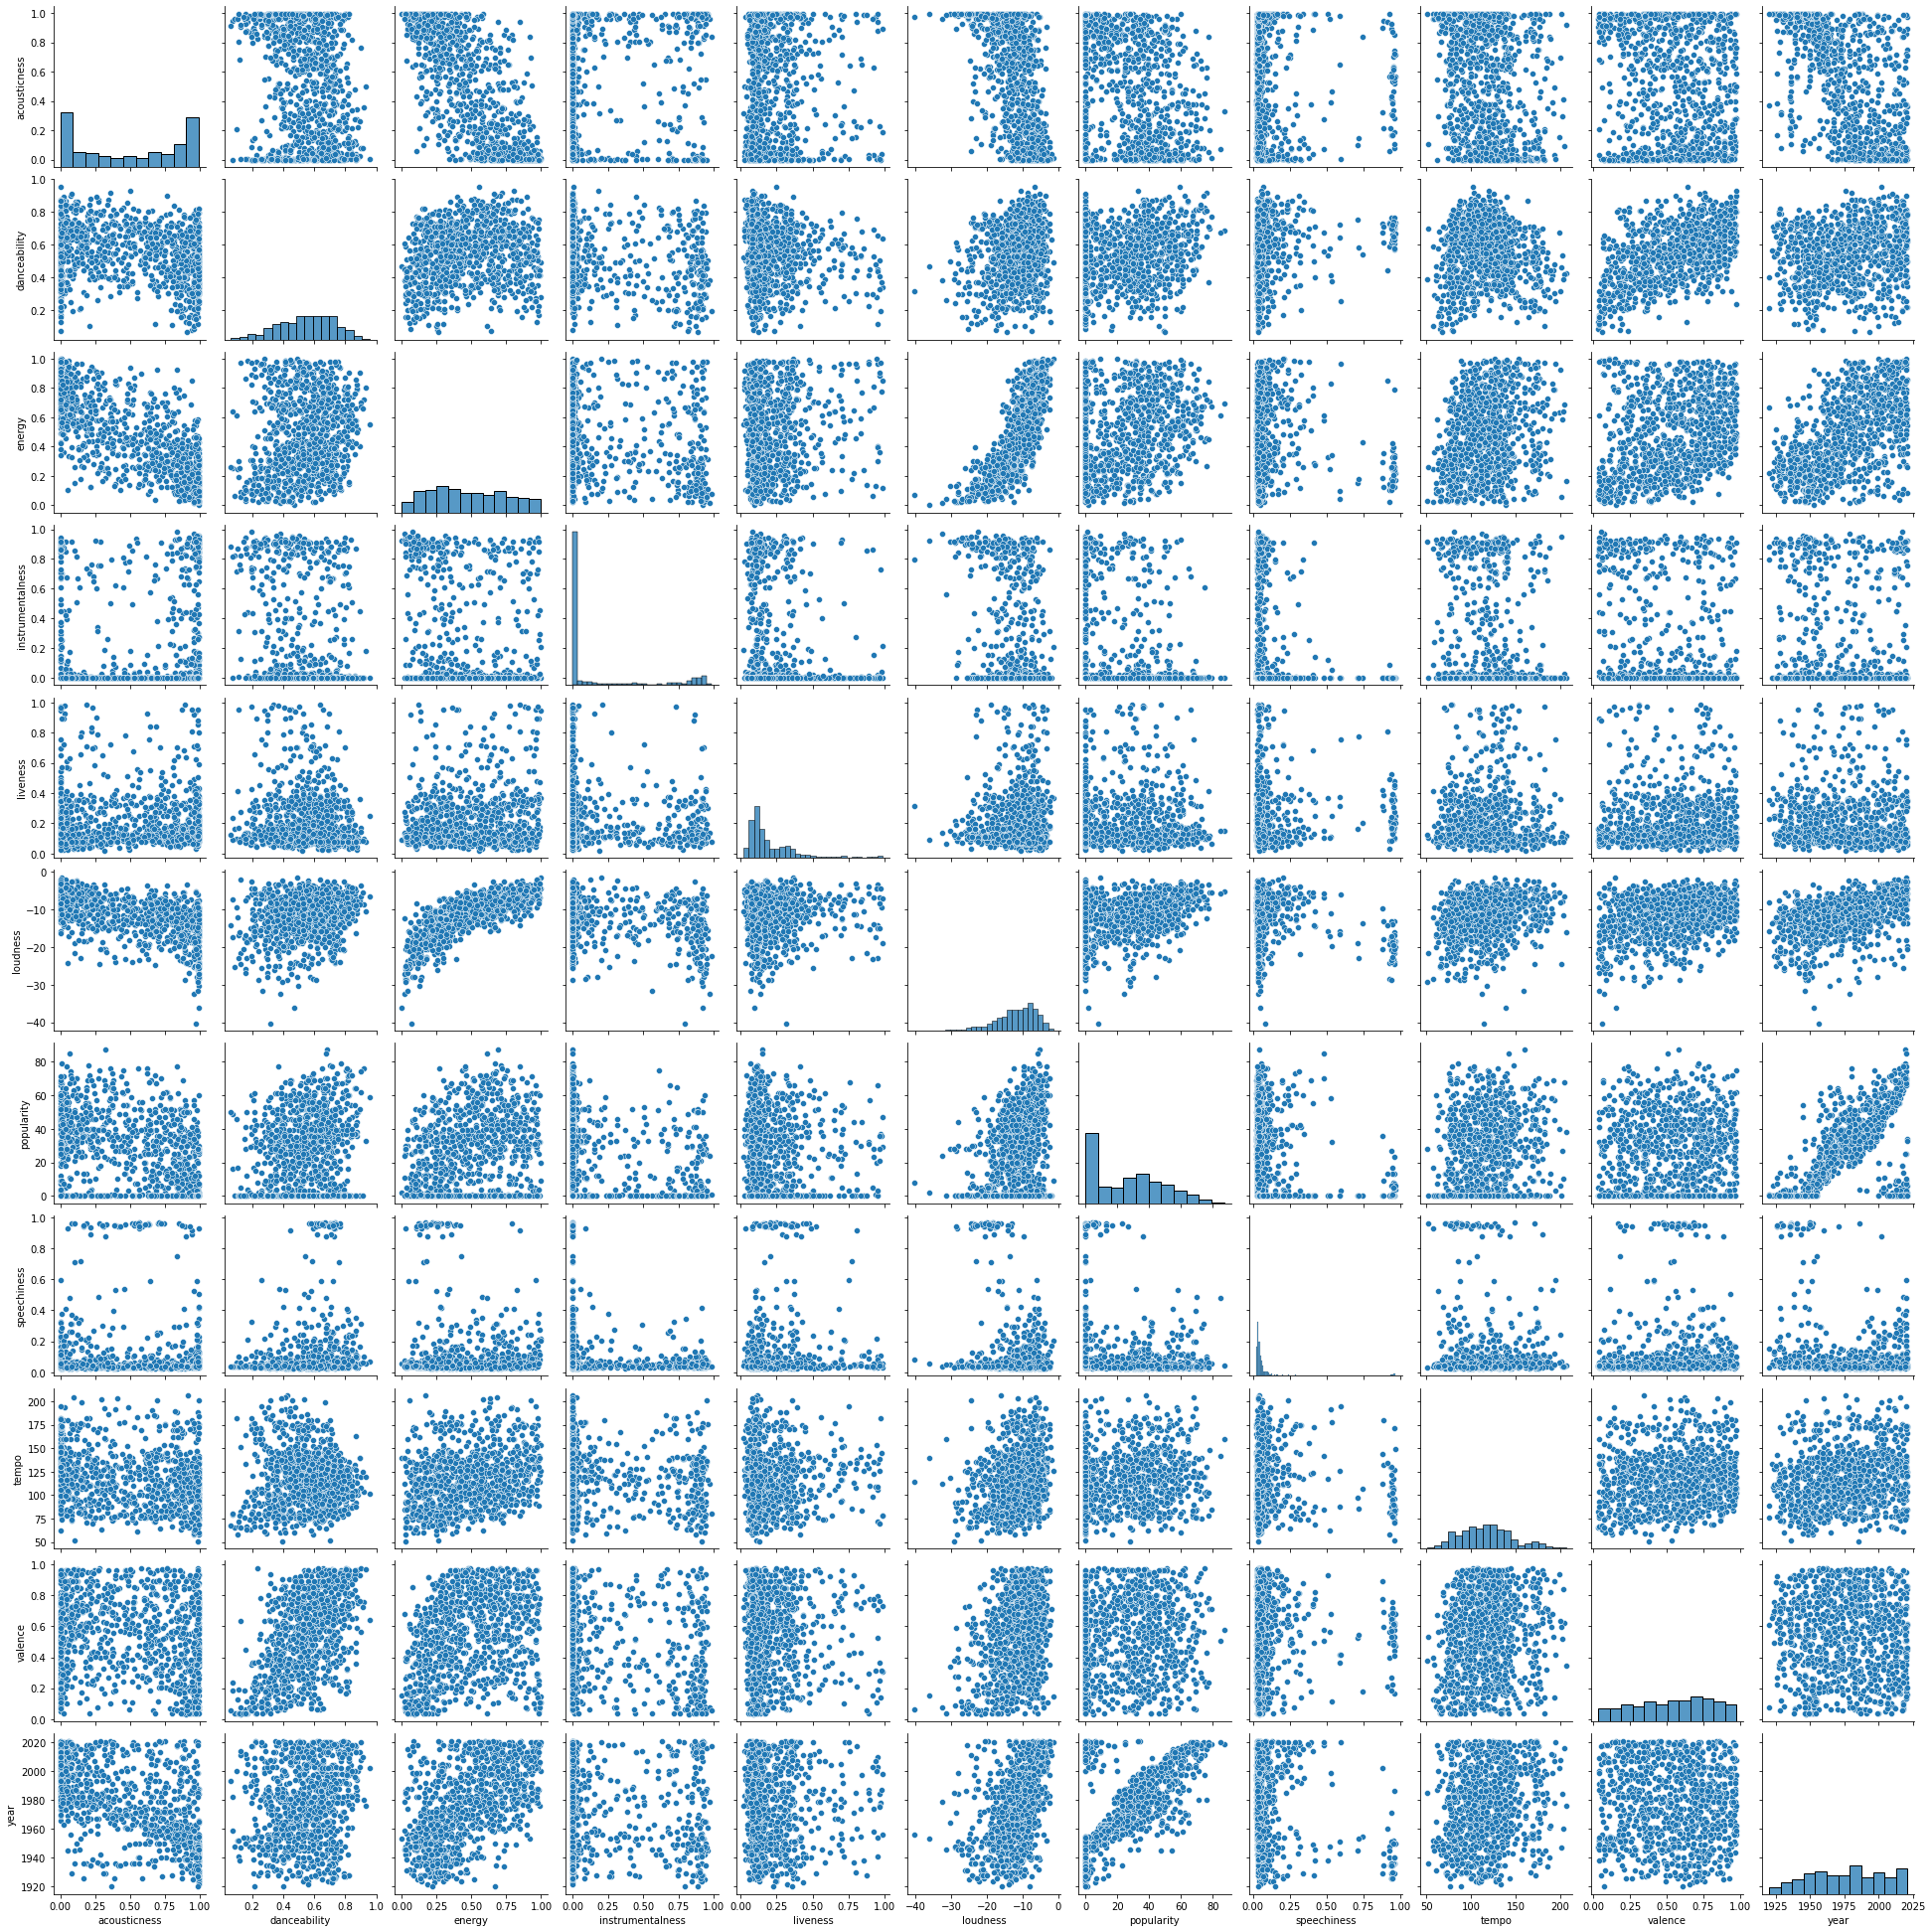

In [ ]:
df_pplot = df.copy()
df_pplot = df_pplot.drop(['explicit', 'mode', 'key', 'id', 'name', 'artists', 'release_date', 'duration_ms'], axis=1) #dropping values that seems in a pairplot nonsense
sbr.pairplot(df_pplot.sample(1000)) #to visualize better

#### Comparison of Danceability and Energy

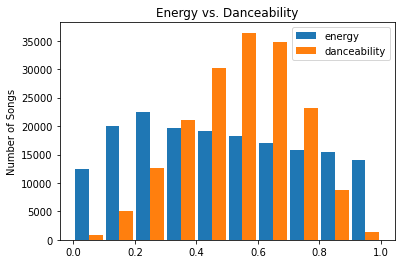

In [ ]:
plt.hist([df["energy"], df["danceability"]], bins=10, rwidth=0.9, label=["energy", "danceability"])
plt.ylabel("Number of Songs")
plt.title("Energy vs. Danceability")
plt.legend(loc='upper right')
plt.show()

They are not increasing in the same manner. So, we cannot talk about that much of a correlation between them.

#### Comparison of Liveness and Speechiness

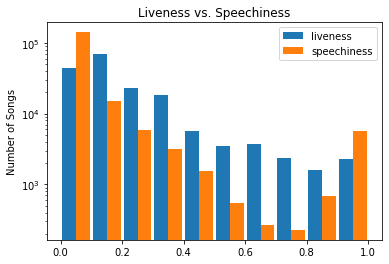

In [ ]:
plt.hist([df["liveness"], df["speechiness"]], bins=10, rwidth=0.9, label=["liveness", "speechiness"], log=True)
plt.ylabel("Number of Songs")
plt.title("Liveness vs. Speechiness")
plt.legend(loc='upper right')
plt.show()

It is better to observe them in a log scaled histogram plot because their top point are just breaking the histogram plot. Liveness and speechiness has a observable correlation. They both are the most while less than 0.2. Then, their trends decrease as their values increase.

#### Comparison of Acousticness and Valence

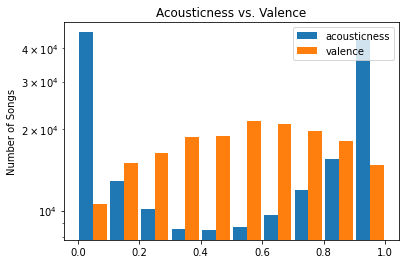

In [ ]:
plt.hist([df["acousticness"], df["valence"]], bins=10, rwidth=0.9, label=["acousticness", "valence"], log=True)
plt.ylabel("Number of Songs")
plt.title("Acousticness vs. Valence")
plt.legend(loc='upper right')
plt.show()

While acousticness increases, valence decreases, or vice versa. There is a negative correlation between these two parameters.

#### Comparison of Popularity and Tempo

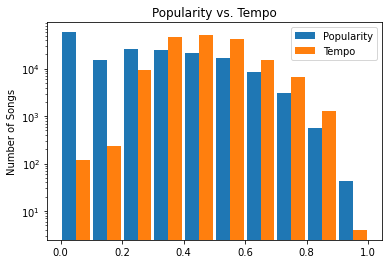

In [ ]:
plt.hist([df["popularity"]/100, df["tempo"]/250], bins=10, rwidth=0.9, label=["Popularity", "Tempo"], log=True)
plt.ylabel("Number of Songs")
plt.title("Popularity vs. Tempo")
plt.legend(loc='upper right')
plt.show()

They have a positive correlation after the value 0.4. Before that, less popular songs are slower songs (negative correlation).

In [ ]:
df_byYear.describe() # statistical information of data by year

mode         year  acousticness  ...     valence  popularity       key
count  100.0   100.000000    100.000000  ...  100.000000  100.000000  100.0000
mean     1.0  1970.500000      0.556317  ...    0.532120   27.376065    3.7900
std      0.0    29.011492      0.275358  ...    0.057809   20.703197    3.5627
min      1.0  1921.000000      0.219931  ...    0.379327    0.140845    0.0000
25%      1.0  1945.750000      0.289516  ...    0.497174    3.298200    0.0000
50%      1.0  1970.500000      0.459190  ...    0.541503   33.619250    2.0000
75%      1.0  1995.250000      0.856711  ...    0.570080   44.943375    7.0000
max      1.0  2020.000000      0.962607  ...    0.663725   65.256542   10.0000

[8 rows x 14 columns]

####Analyzing Each Feature through the Years

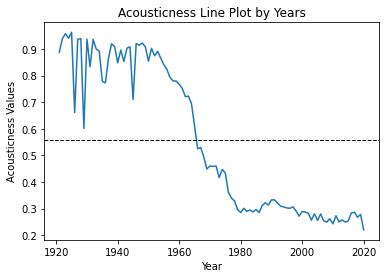

Mean value for acousticness: 
0.556


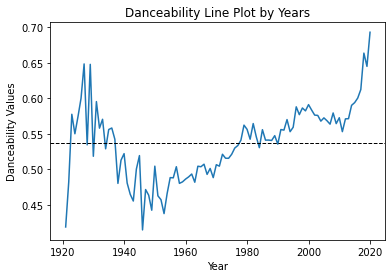

Mean value for danceability: 
0.537


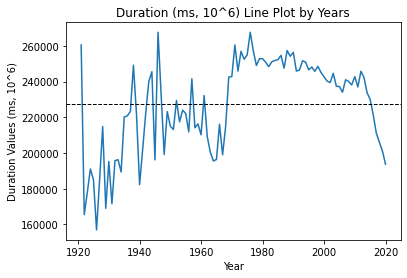

Mean value for duration (in min): 
3.788


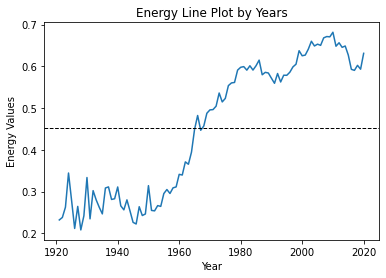

Mean value for energy: 
0.453


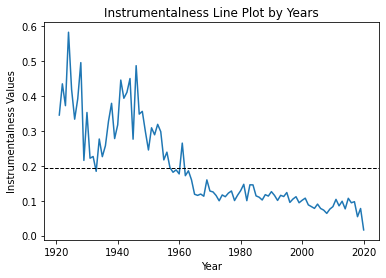

Mean value for instrumentalness: 
0.194


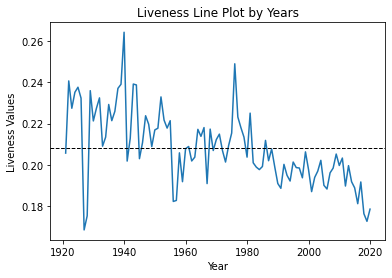

Mean value for liveness: 
0.208


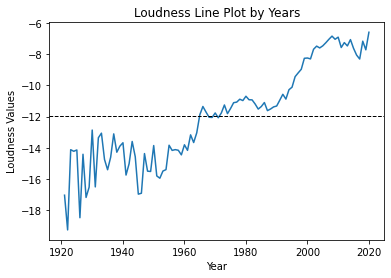

Mean value for loudness: 
-11.969


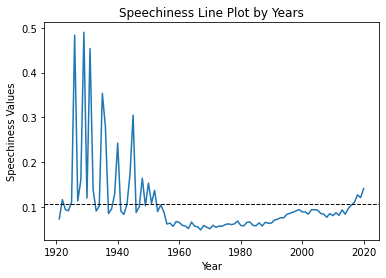

Mean value for speechiness: 
0.106


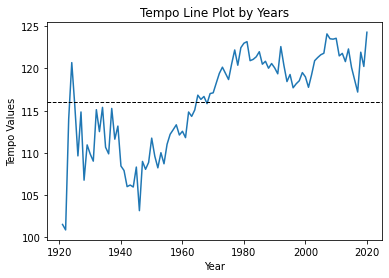

Mean value for tempo: 
116.016


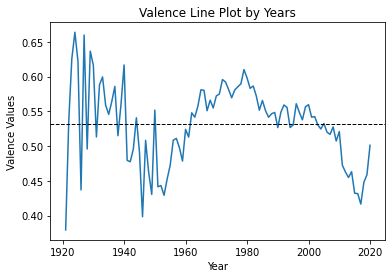

Mean value for valence: 
0.532


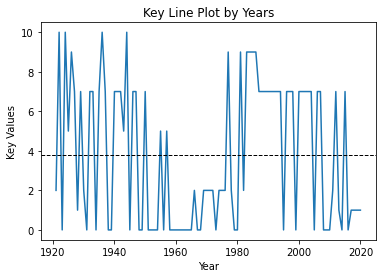

Mean value for key: 
3.79


In [ ]:
df_byYear_2 = df_byYear.copy()
df_byYear_2.set_index(df_byYear_2["year"],inplace=True)

cols = df_byYear_2.columns.tolist()
removal= ['year', 'mode', 'popularity']
for i in removal:
  cols.remove(i)

for column in cols:
  plt.plot(df_byYear_2[column])
  m = df_byYear_2[column].mean()
  plt.axhline(m, color='k', linestyle='dashed', linewidth=1)
  plt.xlabel("Year")
  if column == "duration_ms":
    plt.ylabel("Duration Values (ms, 10^6)")
    plt.title("Duration (ms, 10^6) Line Plot by Years")
  else:
    plt.ylabel(column.capitalize()+ " Values")
    plt.title(column.capitalize()+ " Line Plot by Years")
  plt.show()
  if column == "duration_ms":
    print("Mean value for duration (in min): ")
    m = m/60000
    print(round(m,3))
  else:
    print("Mean value for " + column + ": ")
    print(round(m,3))

After analyzing the change of features over time, we identified that;

- Danceability, energy and tempo of the tracks increased as we move towards 2000's.
- Acousticness, loudness, duration, instrumentalness and liveness of the tracks decreased.
- Speechiness, valence and key features followed a scattered behavior over time, therefore one can not comment on these features clearly.

### Analysis of the Most Popular Artists and Songs

We analyzed the parameters of the most popular 1000 tracks in Spotify archive. We prepared the same graphs we did for the whole data.

In [ ]:
# The table of the most popular 1000 tracks
df_pop = df.sort_values('popularity',ascending=False)
df_pop = df_pop.head(1000)
df_pop

acousticness                               artists  ...  valence  year
20062        0.7210                    ['Olivia Rodrigo']  ...    0.132  2021
19862        0.2210             ['24kGoldn', 'iann dior']  ...    0.756  2020
19866        0.4680                     ['Ariana Grande']  ...    0.682  2020
19886        0.4010          ['Bad Bunny', 'Jhay Cortez']  ...    0.145  2020
19976        0.2120                           ['KAROL G']  ...    0.838  2020
...             ...                                   ...  ...      ...   ...
19404        0.4950  ['SZA', 'Calvin Harris', 'Funk Wav']  ...    0.667  2017
39040        0.0828                             ['Bazzi']  ...    0.591  2019
39038        0.4840                ['Lil Mosey', 'Gunna']  ...    0.726  2019
39032        0.4260                        ['Juice WRLD']  ...    0.263  2019
39028        0.0588             ['Post Malone', 'DaBaby']  ...    0.667  2019

[1000 rows x 19 columns]

In [ ]:
df_pop.describe() # statistical details of the 1000 most popular track

acousticness  danceability  ...      valence         year
count   1000.000000   1000.000000  ...  1000.000000  1000.000000
mean       0.248334      0.659597  ...     0.491909  2013.876000
std        0.261174      0.151086  ...     0.229438    11.858214
min        0.000026      0.000000  ...     0.000000  1942.000000
25%        0.040075      0.559000  ...     0.311250  2015.000000
50%        0.153500      0.678500  ...     0.490000  2019.000000
75%        0.375250      0.771000  ...     0.667000  2020.000000
max        0.982000      0.980000  ...     0.979000  2021.000000

[8 rows x 15 columns]

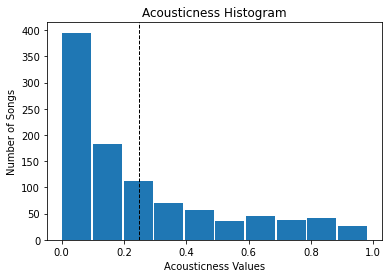

Mean value for acousticness: 
0.248


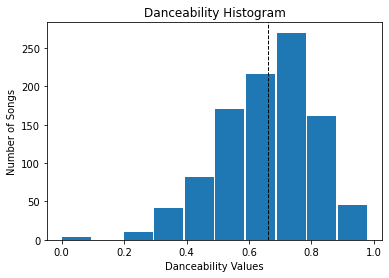

Mean value for danceability: 
0.66


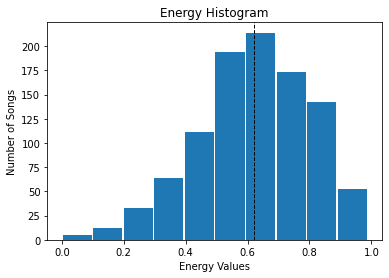

Mean value for energy: 
0.62


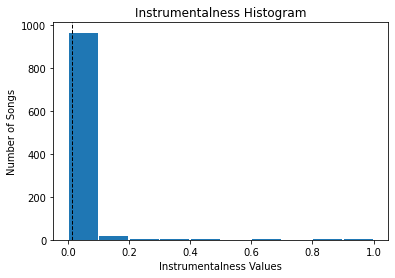

Mean value for instrumentalness: 
0.012


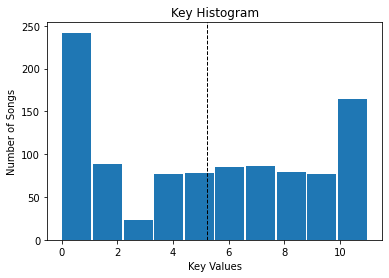

Mean value for key: 
5.241


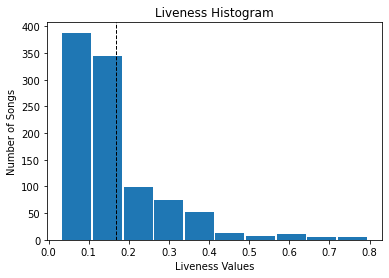

Mean value for liveness: 
0.167


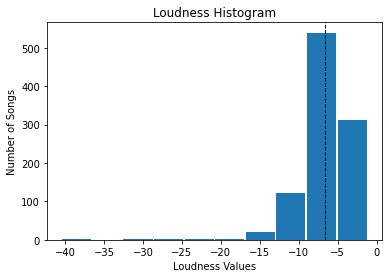

Mean value for loudness: 
-6.659


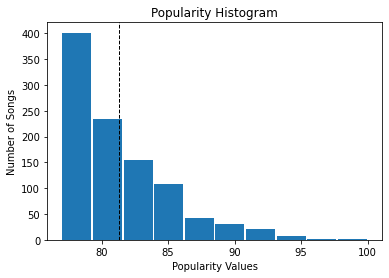

Mean value for popularity: 
81.302


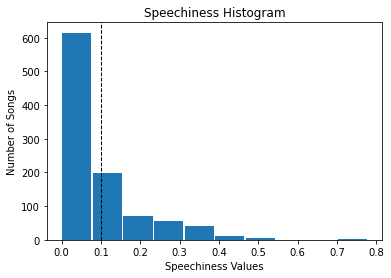

Mean value for speechiness: 
0.1


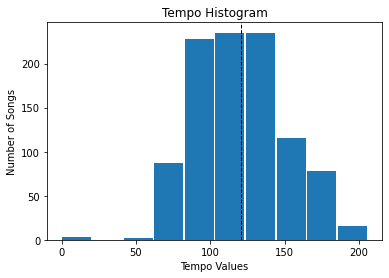

Mean value for tempo: 
120.443


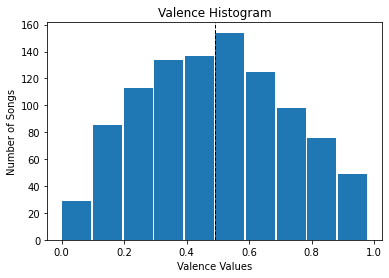

Mean value for valence: 
0.492


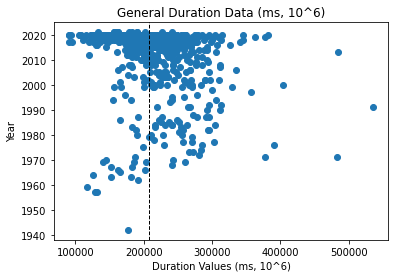

Mean value for duration (in min): 
3.456


In [ ]:
cols = df_pop.columns.tolist()
removal= ['id', 'artists', 'name', 'release_date', 'year', 'duration_ms', 'mode', 'explicit']
for i in removal:
  cols.remove(i)
  
for column in cols:
  plt.hist(df_pop[column], bins=10, rwidth=0.95)
  m = df_pop[column].mean()
  plt.axvline(m, color='k', linestyle='dashed', linewidth=1)
  plt.xlabel(column.capitalize()+ " Values")
  plt.ylabel("Number of Songs")
  plt.title(column.capitalize()+ " Histogram")
  plt.show()
  print("Mean value for " + column + ": ")
  print(round(m,3))

plt.scatter(df_pop["duration_ms"], df_pop["year"])
m = df_pop["duration_ms"].mean()
plt.axvline(m, color='k', linestyle='dashed', linewidth=1)
plt.xlabel("Duration Values (ms, 10^6)")
plt.ylabel("Year")
plt.title("General Duration Data (ms, 10^6)")
plt.show()
print("Mean value for duration (in min): ")
m = m/60000
print(round(m,3))

If we were to analyze the features of the 1000 most popular track and compare them with the general data;

- We saw that the mean values of acousticness, duration of the songs, instrumentalness, liveness and loudness decreased.
- The mean values of tempo, speechiness, key and valence stood the same.
- Danceability and energy mean values increased.

#### Comparison of the Normal Data and the Most Popular 1000 Songs in Each Plot

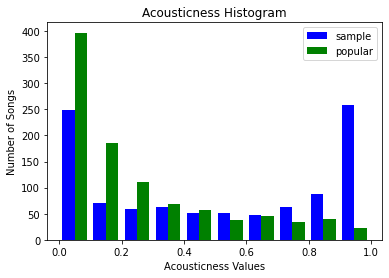

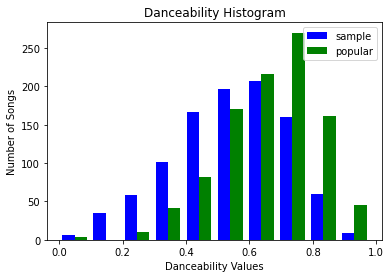

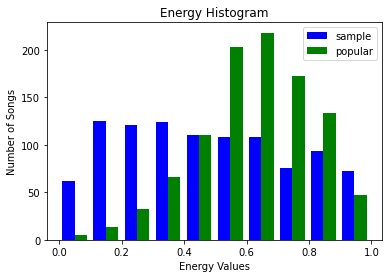

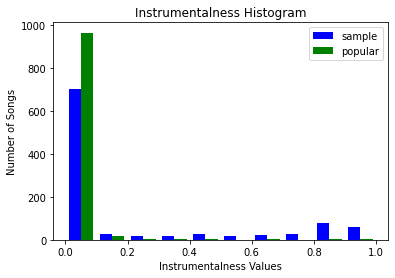

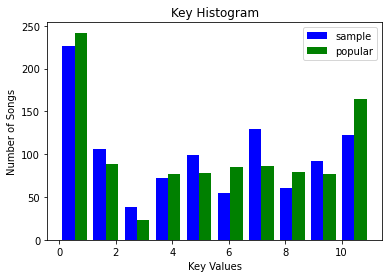

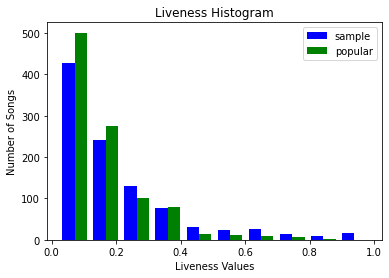

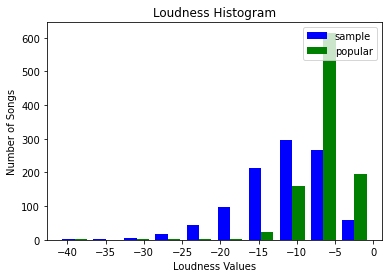

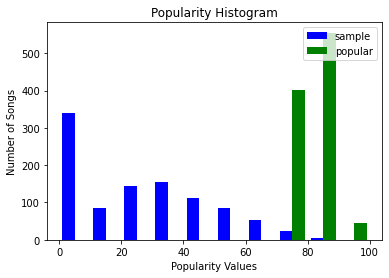

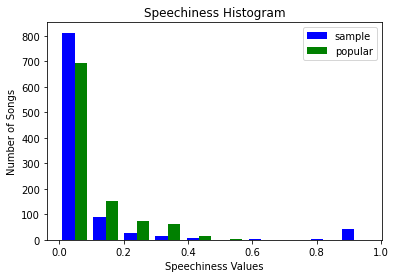

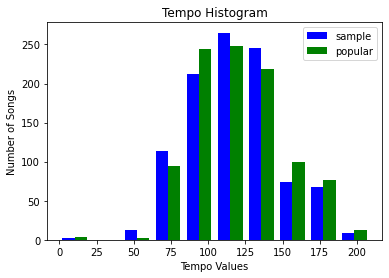

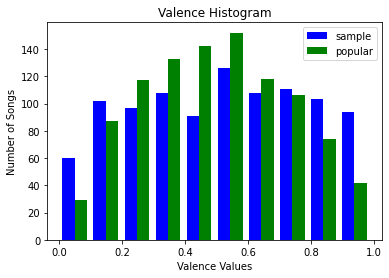

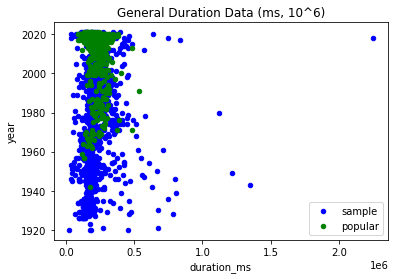

In [ ]:
# when we do with all songs, second data seems like we did not add it,
# thus, it is more appropriate to compare them with the same amount of songs, which is 1000.

cols = df_pop.columns.tolist()
removal= ['id', 'artists', 'name', 'release_date', 'year', 'duration_ms', 'mode', 'explicit']
for i in removal:
  cols.remove(i)
  
for column in cols:
  x = df[column].sample(1000)
  y = df_pop[column]
  plt.hist([x, y], bins=10, label=["sample", "popular"], color=["blue", "green"])
  plt.legend(loc="upper right")
  plt.xlabel(column.capitalize()+ " Values")
  plt.ylabel("Number of Songs")
  plt.title(column.capitalize()+ " Histogram")
  plt.show()
  print(" ") #to separate the plots

ax = df.sample(1000).plot(kind='scatter', x='duration_ms', y='year', color='blue', label='sample')
df_pop.plot(kind='scatter', x='duration_ms', y='year', title="General Duration Data (ms, 10^6)", color='green', label='popular', ax=ax)
plt.show()

### How Songs with Different Genres Change Over Time

In [ ]:
df_control = df.copy()
df_control["artists"] = df_control.artists.apply(lambda x:x.replace("[","").replace("]","").replace("'","").split(","))
df_control = df_control.explode('artists')
df_control = pd.merge(df_control,df_genres[["artists","genres"]],on='artists',how='inner')
df_control.set_index('release_date',inplace=True)
df_control.index = pd.to_datetime(df_control.index)
genre_df = df_control.drop(["artists"],axis=1).drop_duplicates()
decade_popularity = pd.DataFrame()
most_popular_genres = ["pop","indie","rock","metal","rap","jazz"]
for genre in most_popular_genres:
    genre_decade_df = genre_df[genre_df.genres.str.contains(genre)].resample(rule='10A').mean()
    genre_decade_df.index = [f"{(date_index//10)*10}'s" for date_index in genre_decade_df.index.year]
    decade_popularity[genre] = genre_decade_df["popularity"]
decade_popularity.fillna(0,inplace=True)

decade_popularity

pop      indie       rock      metal        rap       jazz
1920's   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000
1930's   0.295918   5.151515   3.665877   0.000000   5.000000   7.437126
1940's   2.277778   1.833333   2.091954   0.000000   2.773810   9.673109
1950's   2.083909   9.400000  16.815261   0.000000  11.926471  10.900322
1960's  16.254791  24.825397  27.512936   0.000000  25.623762  17.321217
1970's  29.519191  33.800895  34.085352  31.571429  35.073171  27.267838
1980's  35.940949  33.625247  36.714238  33.351955  35.863506  33.244839
1990's  39.147541  40.946085  41.898570  37.419385  44.142857  37.104918
2000's  47.006548  48.599004  49.303329  44.889772  53.020305  43.489493
2010's  50.936861  51.126342  39.654381  51.305190  61.574026  36.032407
2020's  51.935126  63.014035  34.816794  39.437100  40.485684  49.847222

#### Temporal Analysis of the Features for the Most Popular Genres

In [ ]:
# filtering the data according to their genres, later on to graph the changes of the features yearly
df_control_2 = df_control.copy()
df_control_2["genres"] = df_control_2.genres.apply(lambda x:x.replace("[","").replace("]","").replace("'","").split(","))
df_control_2 = df_control_2.explode('genres')

df_popGenre = df_control_2[(df_control_2["genres"].str.contains("pop"))]
df_indieGenre = df_control_2[(df_control_2["genres"].str.contains("indie"))]
df_rockGenre = df_control_2[(df_control_2["genres"].str.contains("rock"))]
df_metalGenre = df_control_2[(df_control_2["genres"].str.contains("metal"))]
df_rapGenre = df_control_2[(df_control_2["genres"].str.contains("rap"))]
df_jazzGenre = df_control_2[(df_control_2["genres"].str.contains("jazz"))]

In [ ]:
df_popGenre_2 = df_popGenre.copy()
df_popGenre_2.set_index(df_popGenre_2["year"], inplace=True)
df_popGenre_2

acousticness  artists  danceability  ...  valence  year          genres
year                                       ...                               
1921        0.1480  THE GUY         0.604  ...   0.0778  1921         bow pop
1921        0.1850  THE GUY         0.577  ...   0.5440  1921         bow pop
1921        0.5880  THE GUY         0.341  ...   0.0779  1921         bow pop
1921        0.4470  THE GUY         0.708  ...   0.4060  1921         bow pop
1921        0.1040  THE GUY         0.605  ...   0.2720  1921         bow pop
...            ...      ...           ...  ...      ...   ...             ...
2020        0.0205     RAYE         0.749  ...   0.5340  2020       dance pop
2020        0.0205     RAYE         0.749  ...   0.5340  2020             pop
2020        0.0205     RAYE         0.749  ...   0.5340  2020       pop dance
2020        0.0205     RAYE         0.749  ...   0.5340  2020   post-teen pop
2020        0.0205     RAYE         0.749  ...   0.5340  2020          uk pop

[68922 rows x 19 columns]

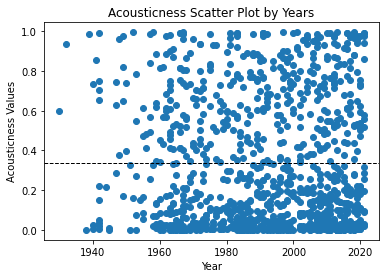

Mean value for acousticness: 
0.337


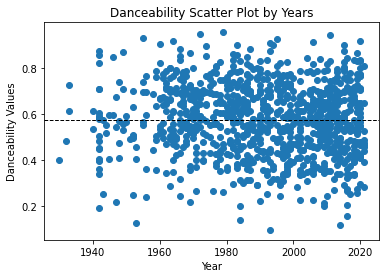

Mean value for danceability: 
0.573


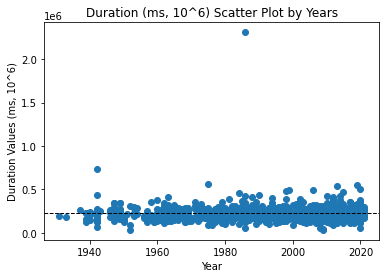

Mean value for duration (in min): 
3.769


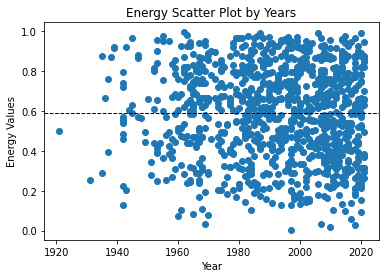

Mean value for energy: 
0.591


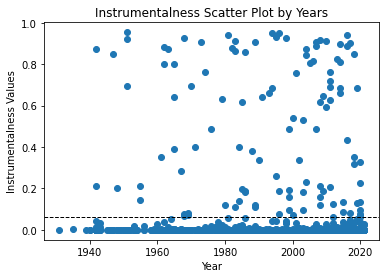

Mean value for instrumentalness: 
0.062


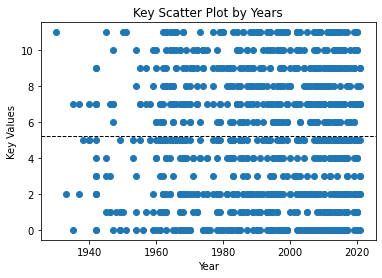

Mean value for key: 
5.222


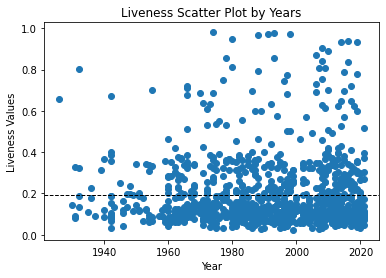

Mean value for liveness: 
0.194


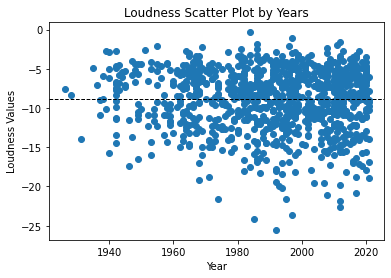

Mean value for loudness: 
-8.852


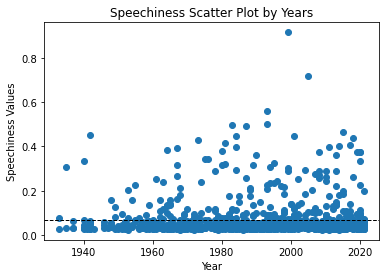

Mean value for speechiness: 
0.068


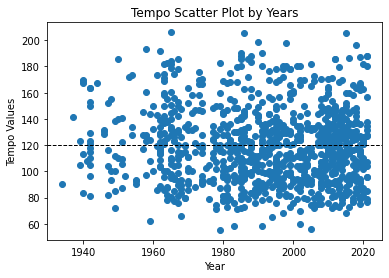

Mean value for tempo: 
120.253


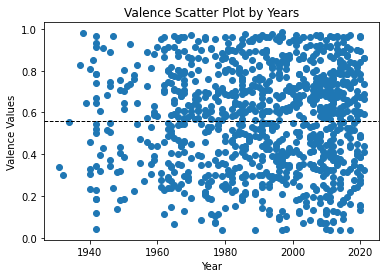

Mean value for valence: 
0.559


In [ ]:
cols_pop = df_popGenre.columns.tolist()
removal= ['level_0', 'index', 'release_date', 'artists', 'explicit', 'id', 'mode', 'name', 'popularity', 'genres', 'year']
for i in removal:
  cols_pop.remove(i)

for column in cols_pop:
  plt.scatter(df_popGenre["year"].sample(1000), df_popGenre[column].sample(1000))
  m = df_popGenre[column].mean()
  plt.axhline(m, color='k', linestyle='dashed', linewidth=1)
  plt.xlabel("Year")
  if column == "duration_ms":
    plt.ylabel("Duration Values (ms, 10^6)")
    plt.title("Duration (ms, 10^6) Scatter Plot by Years")
  else:
    plt.ylabel(column.capitalize()+ " Values")
    plt.title(column.capitalize()+ " Scatter Plot by Years")
  plt.show()
  if column == "duration_ms":
    print("Mean value for duration (in min): ")
    m = m/60000
    print(round(m,3))
  else:
    print("Mean value for " + column + ": ")
    print(round(m,3))

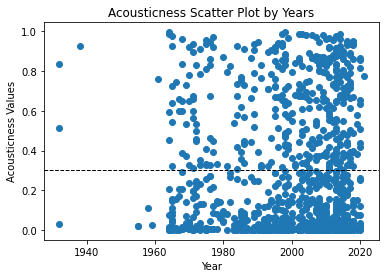

Mean value for acousticness: 
0.3


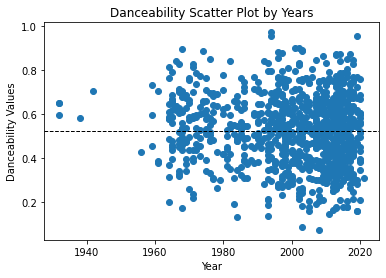

Mean value for danceability: 
0.522


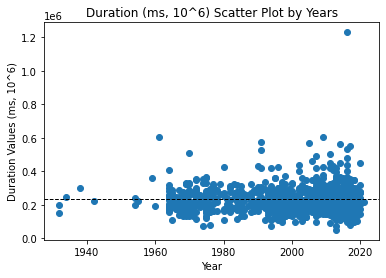

Mean value for duration (in min): 
3.95


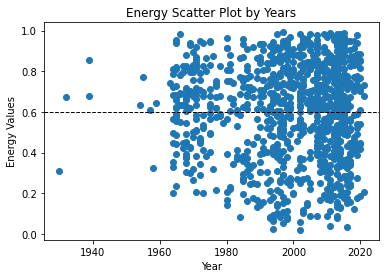

Mean value for energy: 
0.598


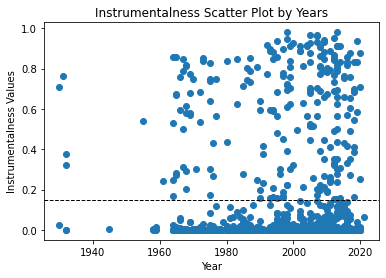

Mean value for instrumentalness: 
0.149


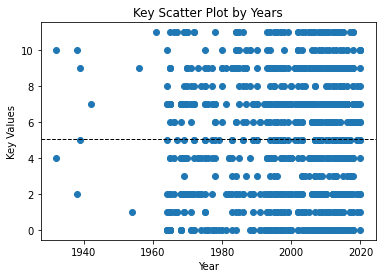

Mean value for key: 
5.042


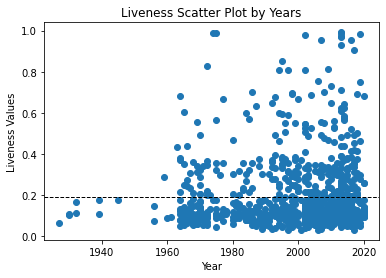

Mean value for liveness: 
0.191


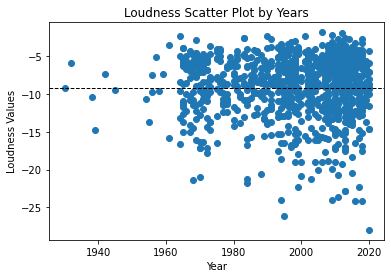

Mean value for loudness: 
-9.203


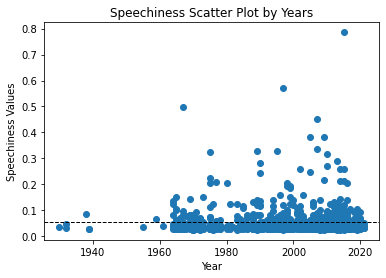

Mean value for speechiness: 
0.055


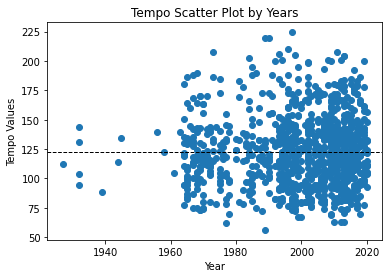

Mean value for tempo: 
122.259


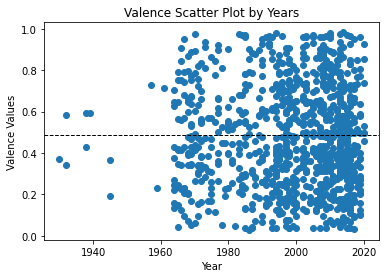

Mean value for valence: 
0.485


In [ ]:
cols_indie = df_indieGenre.columns.tolist()
removal= ['level_0', 'index', 'release_date', 'artists', 'explicit', 'id', 'mode', 'name', 'popularity', 'genres', 'year']
for i in removal:
  cols_indie.remove(i)

for column in cols_indie:
  plt.scatter(df_indieGenre["year"].sample(1000), df_indieGenre[column].sample(1000))
  m = df_indieGenre[column].mean()
  plt.axhline(m, color='k', linestyle='dashed', linewidth=1)
  plt.xlabel("Year")
  if column == "duration_ms":
    plt.ylabel("Duration Values (ms, 10^6)")
    plt.title("Duration (ms, 10^6) Scatter Plot by Years")
  else:
    plt.ylabel(column.capitalize()+ " Values")
    plt.title(column.capitalize()+ " Scatter Plot by Years")
  plt.show()
  if column == "duration_ms":
    print("Mean value for duration (in min): ")
    m = m/60000
    print(round(m,3))
  else:
    print("Mean value for " + column + ": ")
    print(round(m,3))

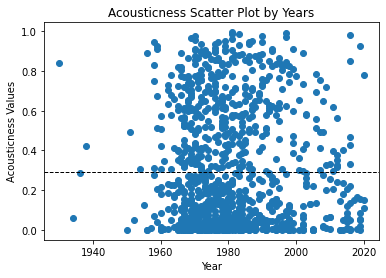

Mean value for acousticness: 
0.291


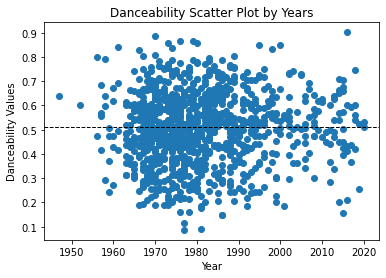

Mean value for danceability: 
0.51


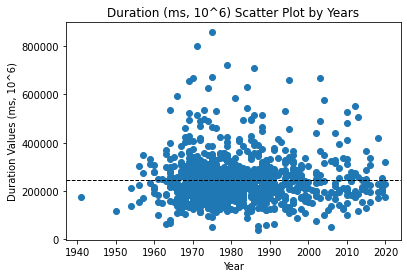

Mean value for duration (in min): 
4.116


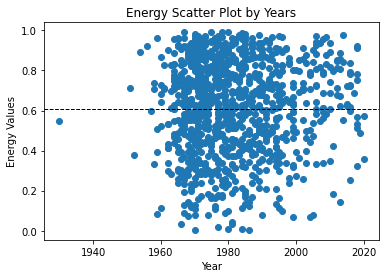

Mean value for energy: 
0.608


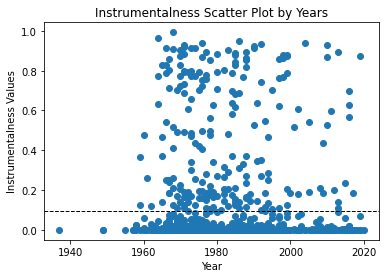

Mean value for instrumentalness: 
0.097


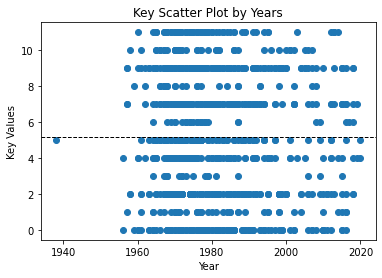

Mean value for key: 
5.144


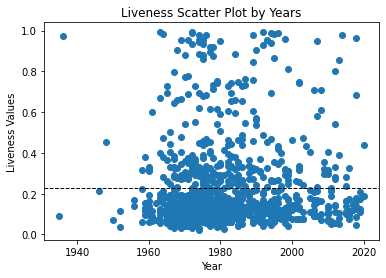

Mean value for liveness: 
0.227


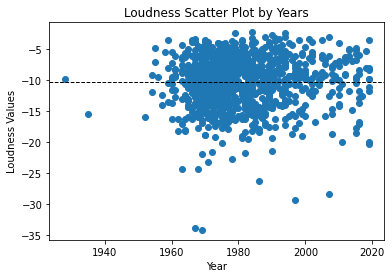

Mean value for loudness: 
-10.188


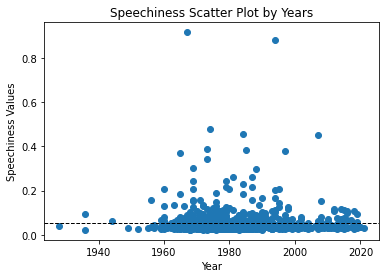

Mean value for speechiness: 
0.055


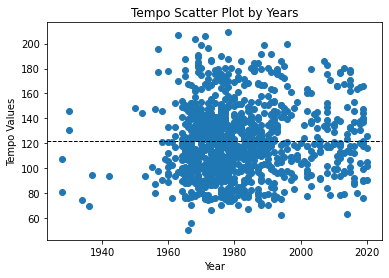

Mean value for tempo: 
122.332


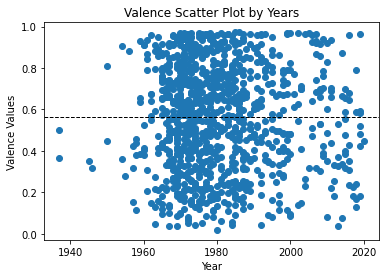

Mean value for valence: 
0.562


In [ ]:
cols_rock = df_rockGenre.columns.tolist()
removal= ['level_0', 'index', 'release_date', 'artists', 'explicit', 'id', 'mode', 'name', 'popularity', 'genres', 'year']
for i in removal:
  cols_rock.remove(i)

for column in cols_rock:
  plt.scatter(df_rockGenre["year"].sample(1000), df_rockGenre[column].sample(1000))
  m = df_rockGenre[column].mean()
  plt.axhline(m, color='k', linestyle='dashed', linewidth=1)
  plt.xlabel("Year")
  if column == "duration_ms":
    plt.ylabel("Duration Values (ms, 10^6)")
    plt.title("Duration (ms, 10^6) Scatter Plot by Years")
  else:
    plt.ylabel(column.capitalize()+ " Values")
    plt.title(column.capitalize()+ " Scatter Plot by Years")
  plt.show()
  if column == "duration_ms":
    print("Mean value for duration (in min): ")
    m = m/60000
    print(round(m,3))
  else:
    print("Mean value for " + column + ": ")
    print(round(m,3))

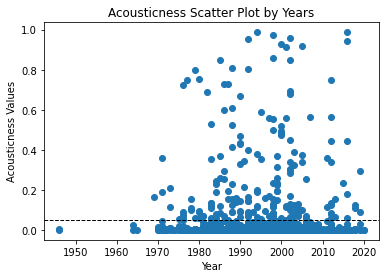

Mean value for acousticness: 
0.052


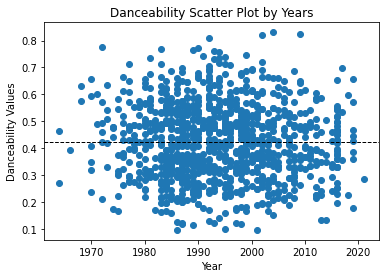

Mean value for danceability: 
0.424


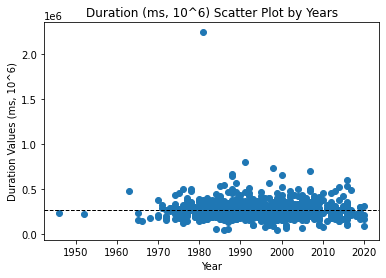

Mean value for duration (in min): 
4.454


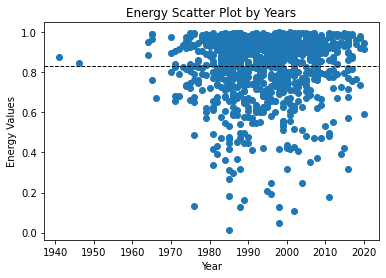

Mean value for energy: 
0.831


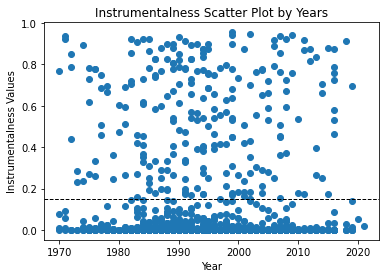

Mean value for instrumentalness: 
0.151


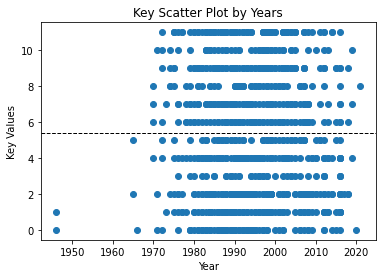

Mean value for key: 
5.378


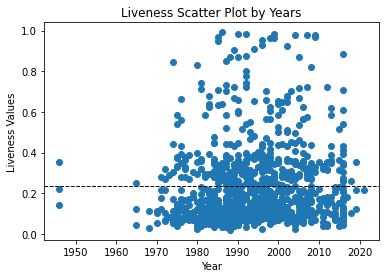

Mean value for liveness: 
0.234


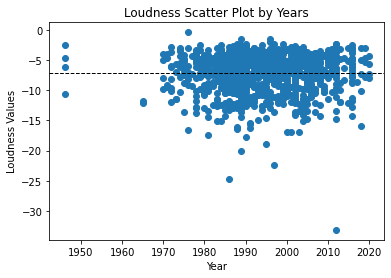

Mean value for loudness: 
-7.108


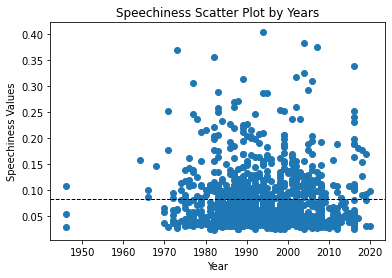

Mean value for speechiness: 
0.082


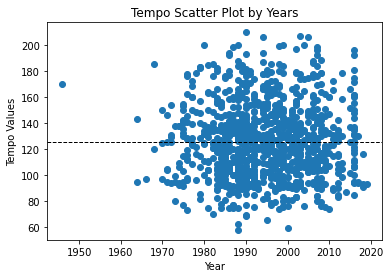

Mean value for tempo: 
125.564


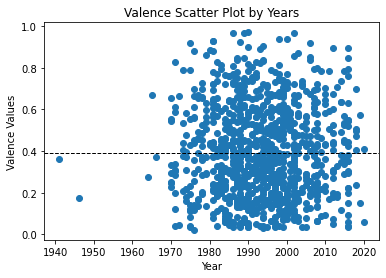

Mean value for valence: 
0.393


In [ ]:
cols_metal = df_metalGenre.columns.tolist()
removal= ['level_0', 'index', 'release_date', 'artists', 'explicit', 'id', 'mode', 'name', 'popularity', 'genres', 'year']
for i in removal:
  cols_metal.remove(i)

for column in cols_metal:
  plt.scatter(df_metalGenre["year"].sample(1000), df_metalGenre[column].sample(1000))
  m = df_metalGenre[column].mean()
  plt.axhline(m, color='k', linestyle='dashed', linewidth=1)
  plt.xlabel("Year")
  if column == "duration_ms":
    plt.ylabel("Duration Values (ms, 10^6)")
    plt.title("Duration (ms, 10^6) Scatter Plot by Years")
  else:
    plt.ylabel(column.capitalize()+ " Values")
    plt.title(column.capitalize()+ " Scatter Plot by Years")
  plt.show()
  if column == "duration_ms":
    print("Mean value for duration (in min): ")
    m = m/60000
    print(round(m,3))
  else:
    print("Mean value for " + column + ": ")
    print(round(m,3))

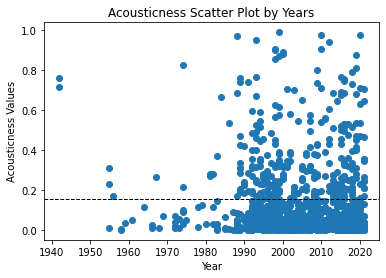

Mean value for acousticness: 
0.155


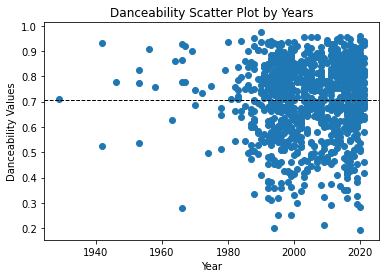

Mean value for danceability: 
0.707


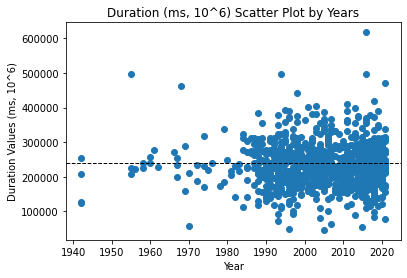

Mean value for duration (in min): 
3.984


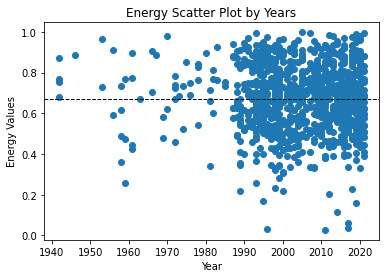

Mean value for energy: 
0.668


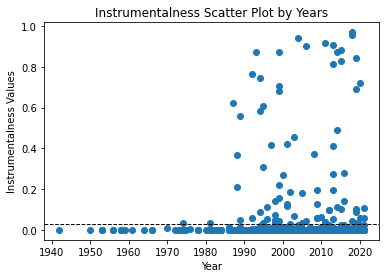

Mean value for instrumentalness: 
0.028


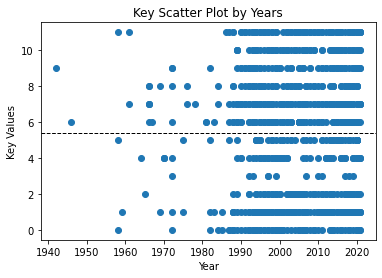

Mean value for key: 
5.374


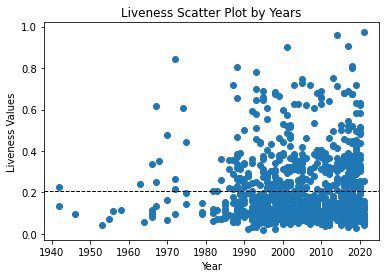

Mean value for liveness: 
0.207


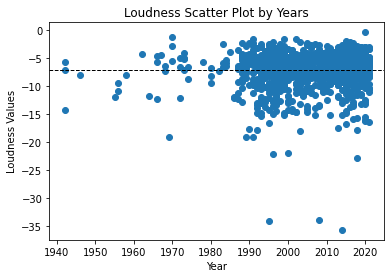

Mean value for loudness: 
-7.237


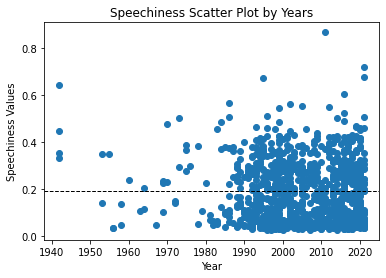

Mean value for speechiness: 
0.192


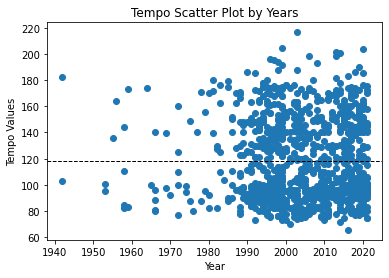

Mean value for tempo: 
118.039


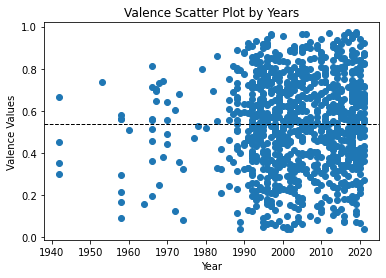

Mean value for valence: 
0.538


In [ ]:
cols_rap = df_rapGenre.columns.tolist()
removal= ['level_0', 'index', 'release_date', 'artists', 'explicit', 'id', 'mode', 'name', 'popularity', 'genres', 'year']
for i in removal:
  cols_rap.remove(i)

for column in cols_rap:
  plt.scatter(df_rapGenre["year"].sample(1000), df_rapGenre[column].sample(1000))
  m = df_rapGenre[column].mean()
  plt.axhline(m, color='k', linestyle='dashed', linewidth=1)
  plt.xlabel("Year")
  if column == "duration_ms":
    plt.ylabel("Duration Values (ms, 10^6)")
    plt.title("Duration (ms, 10^6) Scatter Plot by Years")
  else:
    plt.ylabel(column.capitalize()+ " Values")
    plt.title(column.capitalize()+ " Scatter Plot by Years")
  plt.show()
  if column == "duration_ms":
    print("Mean value for duration (in min): ")
    m = m/60000
    print(round(m,3))
  else:
    print("Mean value for " + column + ": ")
    print(round(m,3))

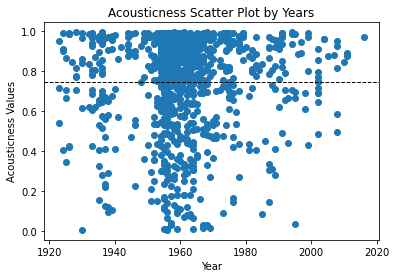

Mean value for acousticness: 
0.747


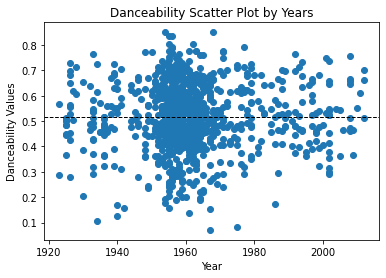

Mean value for danceability: 
0.518


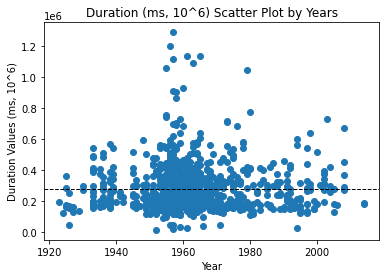

Mean value for duration (in min): 
4.686


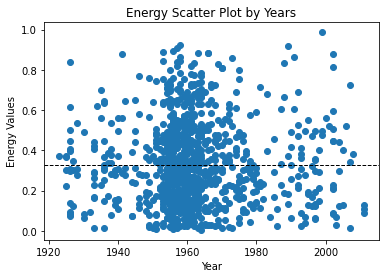

Mean value for energy: 
0.327


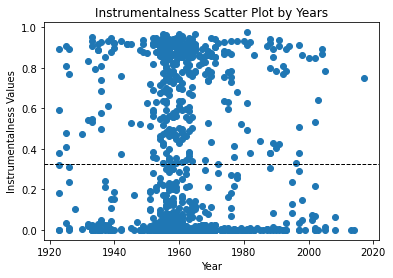

Mean value for instrumentalness: 
0.327


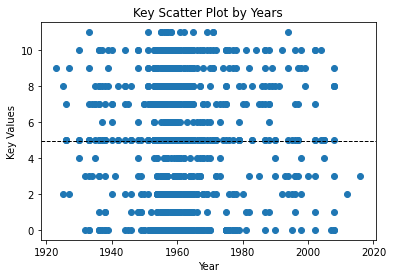

Mean value for key: 
4.973


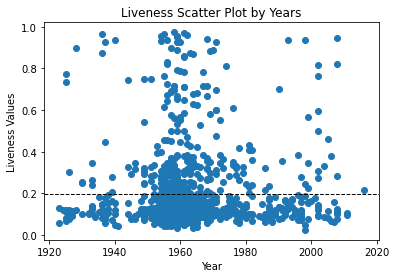

Mean value for liveness: 
0.198


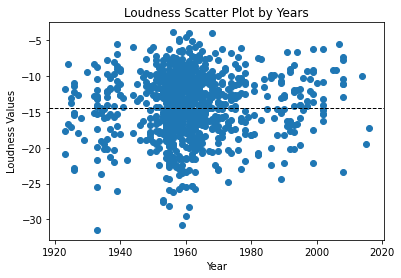

Mean value for loudness: 
-14.459


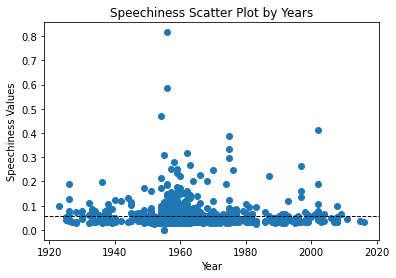

Mean value for speechiness: 
0.059


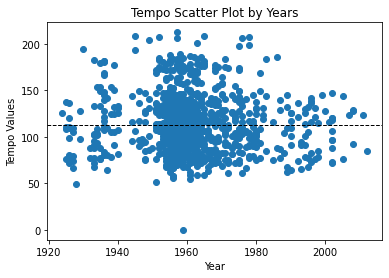

Mean value for tempo: 
113.176


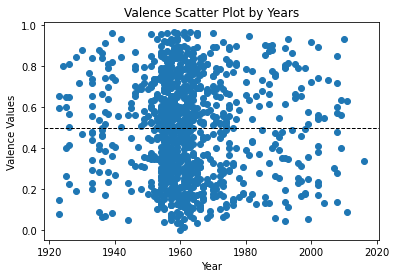

Mean value for valence: 
0.498


In [ ]:
cols_jazz = df_jazzGenre.columns.tolist()
removal= ['level_0', 'index', 'release_date', 'artists', 'explicit', 'id', 'mode', 'name', 'popularity', 'genres', 'year']
for i in removal:
  cols_jazz.remove(i)

for column in cols_jazz:
  plt.scatter(df_jazzGenre["year"].sample(1000), df_jazzGenre[column].sample(1000))
  m = df_jazzGenre[column].mean()
  plt.axhline(m, color='k', linestyle='dashed', linewidth=1)
  plt.xlabel("Year")
  if column == "duration_ms":
    plt.ylabel("Duration Values (ms, 10^6)")
    plt.title("Duration (ms, 10^6) Scatter Plot by Years")
  else:
    plt.ylabel(column.capitalize()+ " Values")
    plt.title(column.capitalize()+ " Scatter Plot by Years")
  plt.show()
  if column == "duration_ms":
    print("Mean value for duration (in min): ")
    m = m/60000
    print(round(m,3))
  else:
    print("Mean value for " + column + ": ")
    print(round(m,3))

As a summary after graphing the temporal analysis of the features of 6 most popular genres, being pop, indie, rock, metal, rap and jazz; we concluded that:

- There's no determinant feature of a specific genre, differentiating it from other genres. All features showed up scattered for each genre.
- Pop genre was always popular throughout the years with steady amount of tracks for each year.
- Jazz music was popular especially around 1960's with most entries belonging to those times.
- Indie music exploded around 1960's with almost no entries before those times, similar to rock music.
- Metal genres is the loudest genre among the others.
- Rap genre is the most lyrical genre, becoming popular starting with 1980's and 90's.

### Comparison of Post-COVID Metrics with General Metrics

Additional to the tasks given under exploratory data analysis, we analyzed the recent data to compare before and after Covid-19 trends. Our aim is to observe if there are any changes in the features of the tracks, such as danceability, energy or duration.

In [ ]:
# Filtering the songs released after the pandemic started
df_recent = df[(df["release_date"] > "2020-01-01")]
df_recent.head()

acousticness            artists  danceability  ...    tempo  valence  year
9111         0.881  ['Joni Mitchell']         0.644  ...  117.072    0.441  2020
9117         0.955  ['Joni Mitchell']         0.627  ...  115.864    0.299  2020
9119         0.888  ['Joni Mitchell']         0.581  ...   88.303    0.642  2020
9121         0.930  ['Joni Mitchell']         0.442  ...  121.662    0.554  2020
9129         0.949  ['Joni Mitchell']         0.570  ...  135.687    0.348  2020

[5 rows x 19 columns]

In [ ]:
df_recent.describe() # the statisctial properties of post COVID data

acousticness  danceability  ...      valence         year
count   6105.000000   6105.000000  ...  6105.000000  6105.000000
mean       0.244243      0.619159  ...     0.462955  2020.301392
std        0.319509      0.168632  ...     0.265860     0.458900
min        0.000001      0.000000  ...     0.000000  2020.000000
25%        0.006290      0.509000  ...     0.233000  2020.000000
50%        0.084000      0.642000  ...     0.458000  2020.000000
75%        0.376000      0.744000  ...     0.680000  2021.000000
max        0.996000      0.987000  ...     0.997000  2021.000000

[8 rows x 15 columns]

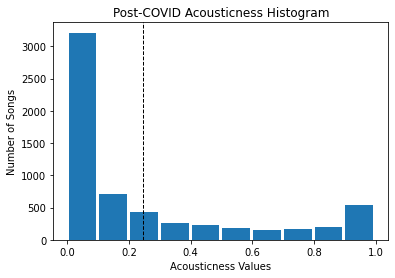

Mean value for acousticness: 
0.244


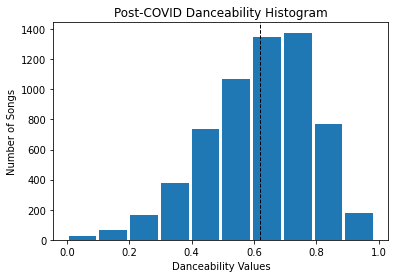

Mean value for danceability: 
0.619


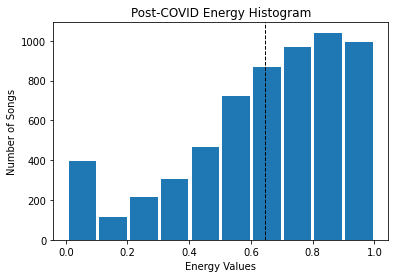

Mean value for energy: 
0.646


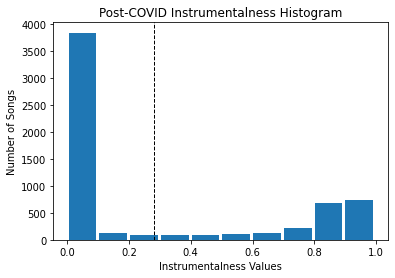

Mean value for instrumentalness: 
0.281


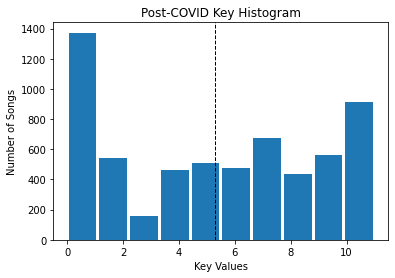

Mean value for key: 
5.303


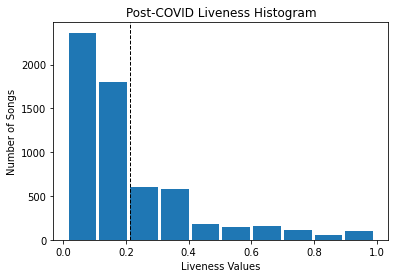

Mean value for liveness: 
0.213


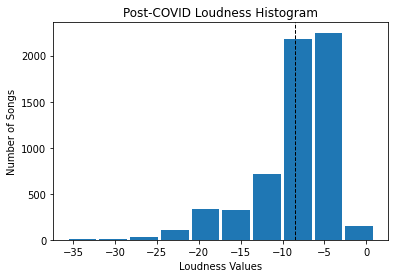

Mean value for loudness: 
-8.506


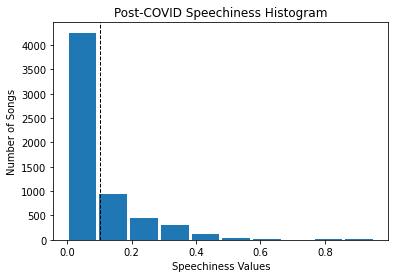

Mean value for speechiness: 
0.103


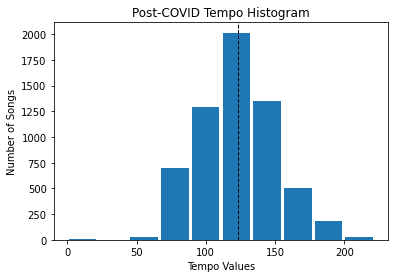

Mean value for tempo: 
123.041


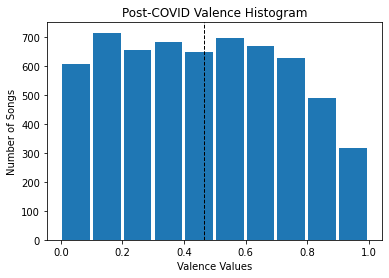

Mean value for valence: 
0.463


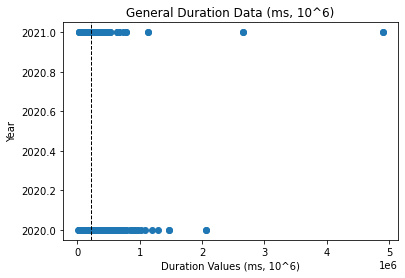

Mean value for duration (in min): 
3.666


In [ ]:
cols = df_recent.columns.tolist()
removal= ['id', 'artists', 'name', 'release_date', 'year', 'duration_ms', 'mode', 'explicit', 'popularity']
for i in removal:
  cols.remove(i)
  
for column in cols:
  plt.hist(df_recent[column], bins=10, rwidth=0.9)
  m = df_recent[column].mean()
  plt.axvline(m, color='k', linestyle='dashed', linewidth=1)
  plt.xlabel(column.capitalize()+ " Values")
  plt.ylabel("Number of Songs")
  plt.title("Post-COVID " + column.capitalize()+ " Histogram")
  plt.show()
  print("Mean value for " + column + ": ")
  print(round(m,3))

plt.scatter(df_recent["duration_ms"], df_recent["year"])
m = df_recent["duration_ms"].mean()
plt.axvline(m, color='k', linestyle='dashed', linewidth=1)
plt.xlabel("Duration Values (ms, 10^6)")
plt.ylabel("Year")
plt.title("General Duration Data (ms, 10^6)")
plt.show()
print("Mean value for duration (in min): ")
m = m/60000
print(round(m,3))

After comparing post COVID data with the general data we analyzed at the beginning, we have seen that;

- Danceability, energy, instrumentalness and tempo of the tracks increased. This shows us people became more interested in dynamic  songs while in lockdown.
- Acousticness, loudness, valence and duration of the songs decreased. From these changes, we may comment that people became more depressed as well, although the songs became more dynamic, their content became pessimistic and the tracks themselves became more monotone.
- Lastly; key, liveness and speechiness features didn't change.


# Hypothesis Testing



## Statistical tests on the effect of features to popularity

**Testing Method: (for all the hypothesis below)**

First of all, we identified our null and alternative hypothesis. Then, we constructed two new lists for our datasets which we want to examine. we classified "n" as 100 in order to apply Central Limit Theorem. Finally, we calculated our test statistic and p_value to reject or fail to reject the null hypothesis.

### Hypothesis 1:

**Null Hypothesis:**

Danceability does not effect the popularity of a song.

**Alternative Hypothesis:**

Danceability effects the popularity of a song.

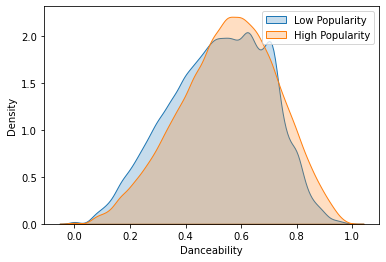

In [ ]:
df_hypot_1 = df[["year", "danceability", "popularity"]]
# We took the median value for danceability in order to create two equal sized groups
median_pop1 = df_hypot_1["popularity"].median()

lower_1 = df_hypot_1[df_hypot_1["popularity"] <= median_pop1]
upper_1 = df_hypot_1[df_hypot_1["popularity"] > median_pop1]

ax = sbr.kdeplot(lower_1["danceability"].rename("Danceability"), shade=True, label="Low Popularity")
sbr.kdeplot(upper_1["danceability"].rename("Danceability"),  ax=ax, shade=True, label="High Popularity")

plt.legend()
plt.show()

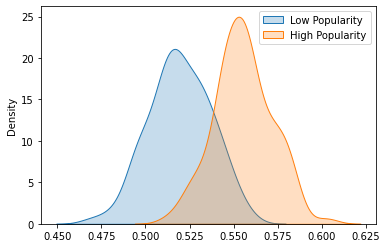

In [ ]:
lower_1_clt = lower_1.copy()

lower_1_list = []

for i in range (0,100):
  lower_1_list.append(lower_1_clt.sample(100)["danceability"].mean())

upper_1_clt = upper_1.copy()

upper_1_list = []

for i in range (0,100):
  upper_1_list.append(upper_1_clt.sample(100)["danceability"].mean())

ax = sbr.kdeplot(lower_1_list, shade=True, label="Low Popularity")
sbr.kdeplot(upper_1_list,  ax=ax, shade=True, label="High Popularity")

plt.legend()
plt.show()

In [ ]:
significance = 0.05

t, p_value = stats.ttest_ind(a=lower_1_list, b=upper_1_list, equal_var=False)
print("test statistic: ", format(t,".2E"))
print("P value: ",format(p_value,".2E"))
print("Signifance Level:", significance)
if (p_value < significance):
  print("Based on the current value of p value we reject the null hypothesis, danceability effects the popularity of a track.")
else:
  print("Based on the current value of p value we fail to reject the null hypothesis, danceability does not effect the popularity of a track.")

test statistic:  -1.51E+01
P value:  1.21E-34
Signifance Level: 0.05
Based on the current value of p value we reject the null hypothesis, danceability effects the popularity of a track.


In light of our findings, we can say that as the higher the danceability, the more popular the track is, meaning that the correlation between danceability and popularity is positive.

### Hypothesis 2:

**Null Hypothesis:**

Acousticness does not effect the popularity of a track.

**Alternative Hypothesis:**

Acousticness has an effect on the popularity of a track.

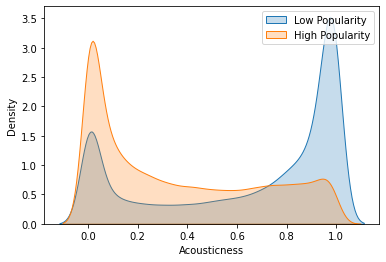

In [ ]:
df_hypot_2 = df[["year", "acousticness", "popularity"]]
# We took the median value for popularity in order to create two equal sized groups
median_pop2 = df_hypot_2["popularity"].median()

lower_2 = df_hypot_2[df_hypot_2["popularity"] <= median_pop2]
upper_2 = df_hypot_2[df_hypot_2["popularity"] > median_pop2]

ax = sbr.kdeplot(lower_2["acousticness"].rename("Acousticness"), shade=True, label="Low Popularity")
sbr.kdeplot(upper_2["acousticness"].rename("Acousticness"),  ax=ax, shade=True, label="High Popularity")

plt.legend()
plt.show()

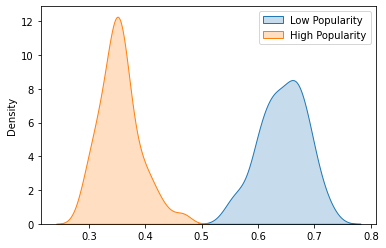

In [ ]:
lower_2_clt = lower_2.copy()

lower_2_list = []

for i in range (0,100):
  lower_2_list.append(lower_2_clt.sample(100)["acousticness"].mean())

upper_2_clt = upper_2.copy()

upper_2_list = []

for i in range (0,100):
  upper_2_list.append(upper_2_clt.sample(100)["acousticness"].mean())

ax = sbr.kdeplot(lower_2_list, shade=True, label="Low Popularity")
sbr.kdeplot(upper_2_list,  ax=ax, shade=True, label="High Popularity")

plt.legend()
plt.show()

In [ ]:
significance = 0.05

t, p_value = stats.ttest_ind(a=lower_2_list, b=upper_2_list, equal_var=False)
print("test statistic: ", format(t,".2E"))
print("P value: ",format(p_value,".2E"))
print("Signifance Level:", significance)
if (p_value < significance):
  print("Based on the current value of p value we reject the null hypothesis, acousticness has an effect on the popularity of a track.")
else:
  print("Based on the current value of p value we fail to reject the null hypothesis, acousticness does not effect the popularity of a track.")

test statistic:  5.27E+01
P value:  4.60E-117
Signifance Level: 0.05
Based on the current value of p value we reject the null hypothesis, acousticness has an effect on the popularity of a track.


As a result of our evaluation, we have seen that acousticness effects the popularity of a track in a negative manner. The higher the acousticness, the lower the popularity, implying a negative correlation.

### Hypothesis 3:

**Null Hypothesis:**

Energy does not effect the popularity of a track.

**Alternative Hypothesis:**

Energy effects the popularity of a track.

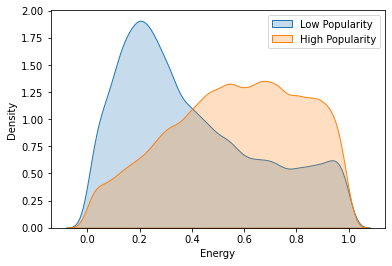

In [ ]:
df_hypot_3 = df[["year", "energy", "popularity"]]
# We took the median value for popularity in order to create two equal sized groups
median_pop3 = df_hypot_3["popularity"].median()

lower_3 = df_hypot_3[df_hypot_3["popularity"] <= median_pop3]
upper_3 = df_hypot_3[df_hypot_3["popularity"] > median_pop3]

ax = sbr.kdeplot(lower_3["energy"].rename("Energy"), shade=True, label="Low Popularity")
sbr.kdeplot(upper_3["energy"].rename("Energy"),  ax=ax, shade=True, label="High Popularity")

plt.legend()
plt.show()

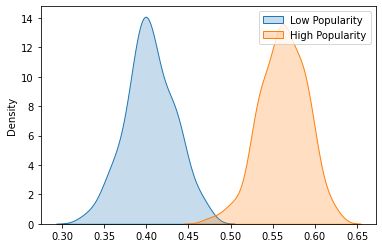

In [ ]:
lower_3_clt = lower_3.copy()

lower_3_list = []

for i in range (0,100):
  lower_3_list.append(lower_3_clt.sample(100)["energy"].mean())

upper_3_clt = upper_3.copy()

upper_3_list = []

for i in range (0,100):
  upper_3_list.append(upper_3_clt.sample(100)["energy"].mean())

ax = sbr.kdeplot(lower_3_list, shade=True, label="Low Popularity")
sbr.kdeplot(upper_3_list,  ax=ax, shade=True, label="High Popularity")

plt.legend()
plt.show()

In [ ]:
significance = 0.05

t, p_value = stats.ttest_ind(a=lower_3_list, b=upper_3_list, equal_var=False)
print("test statistic: ", format(t,".2E"))
print("P value: ",format(p_value,".2E"))
print("Signifance Level:", significance)
if (p_value < significance):
  print("Based on the current value of p value we reject the null hypothesis, energy effects the popularity of a track.")
else:
  print("Based on the current value of p value we fail to reject the null hypothesis, energy does not effect the popularity of a track.")

test statistic:  -3.97E+01
P value:  4.01E-96
Signifance Level: 0.05
Based on the current value of p value we reject the null hypothesis, energy effects the popularity of a track.


We can say that there is a positive correlation between energy and popularity of a track, the more energetic the track is, the more popular it is.

### Hypothesis 4:

**Null Hypothesis:**

Instrumentalness has no effect on the popularity of a track.

**Alternative Hypothesis:**

Instrumentalness effects the popularity of a track.

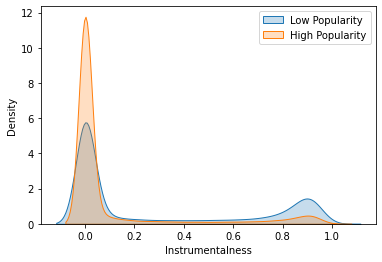

In [ ]:
df_hypot_4 = df[["year", "instrumentalness", "popularity"]]
# We took the median value for popularity in order to create two equal sized groups
median_pop4 = df_hypot_4["popularity"].median()

lower_4 = df_hypot_4[df_hypot_4["popularity"] <= median_pop4]
upper_4 = df_hypot_4[df_hypot_4["popularity"] > median_pop4]

ax = sbr.kdeplot(lower_4["instrumentalness"].rename("Instrumentalness"), shade=True, label="Low Popularity")
sbr.kdeplot(upper_4["instrumentalness"].rename("Instrumentalness"),  ax=ax, shade=True, label="High Popularity")

plt.legend()
plt.show()

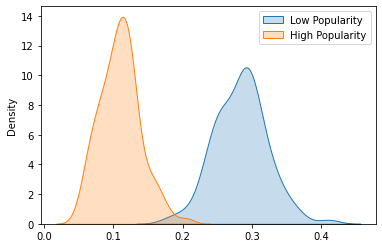

In [ ]:
lower_4_clt = lower_4.copy()

lower_4_list = []

for i in range (0,100):
  lower_4_list.append(lower_4_clt.sample(100)["instrumentalness"].mean())

upper_4_clt = upper_4.copy()

upper_4_list = []

for i in range (0,100):
  upper_4_list.append(upper_4_clt.sample(100)["instrumentalness"].mean())

ax = sbr.kdeplot(lower_4_list, shade=True, label="Low Popularity")
sbr.kdeplot(upper_4_list,  ax=ax, shade=True, label="High Popularity")

plt.legend()
plt.show()

In [ ]:
significance = 0.05

t, p_value = stats.ttest_ind(a=lower_4_list, b=upper_4_list, equal_var=False)
print("test statistic: ", format(t,".2E"))
print("P value: ",format(p_value,".2E"))
print("Signifance Level:", significance)
if (p_value < significance):
  print("Based on the current value of p value we reject the null hypothesis, instrumentalness effects on the popularity of a track.")
else:
  print("Based on the current value of p value we fail to reject the null hypothesis, instrumentalness has no effect on the popularity of a track.")

test statistic:  3.63E+01
P value:  5.46E-86
Signifance Level: 0.05
Based on the current value of p value we reject the null hypothesis, instrumentalness effects on the popularity of a track.


Our results imply that people tend to listen to non-instrumental songs more, less instrumental songs seem to be more popular.

### Hypothesis 5:

**Null Hypothesis:**

Liveness does not effect the popularity of a track.

**Alternative Hypothesis:**

Liveness effects the popularity of a track.

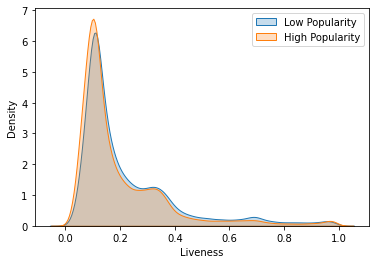

In [ ]:
df_hypot_5 = df[["year", "liveness", "popularity"]]
# We took the median value for popularity in order to create two equal sized groups
median_pop5 = df_hypot_5["popularity"].median()

lower_5 = df_hypot_5[df_hypot_5["popularity"] <= median_pop5]
upper_5 = df_hypot_5[df_hypot_5["popularity"] > median_pop5]

ax = sbr.kdeplot(lower_5["liveness"].rename("Liveness"), shade=True, label="Low Popularity")
sbr.kdeplot(upper_5["liveness"].rename("Liveness"),  ax=ax, shade=True, label="High Popularity")

plt.legend()
plt.show()

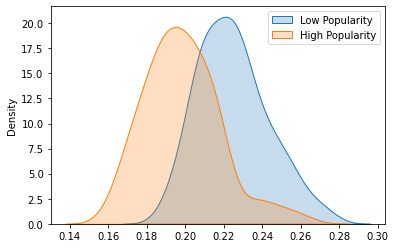

In [ ]:
lower_5_clt = lower_5.copy()

lower_5_list = []

for i in range (0,100):
  lower_5_list.append(lower_5_clt.sample(100)["liveness"].mean())

upper_5_clt = upper_5.copy()

upper_5_list = []

for i in range (0,100):
  upper_5_list.append(upper_5_clt.sample(100)["liveness"].mean())

ax = sbr.kdeplot(lower_5_list, shade=True, label="Low Popularity")
sbr.kdeplot(upper_5_list,  ax=ax, shade=True, label="High Popularity")

plt.legend()
plt.show()

In [ ]:
significance = 0.05

t, p_value = stats.ttest_ind(a=lower_5_list, b=upper_5_list, equal_var=False)
print("test statistic: ", format(t,".2E"))
print("P value: ",format(p_value,".2E"))
print("Signifance Level:", significance)
if (p_value < significance):
  print("Based on the current value of p value we reject the null hypothesis, liveness effects the popularity of a track.")
else:
  print("Based on the current value of p value we fail to reject the null hypothesis, liveness does not effect the popularity of a track.")

test statistic:  9.84E+00
P value:  7.90E-19
Signifance Level: 0.05
Based on the current value of p value we reject the null hypothesis, liveness effects the popularity of a track.


This time we have seen that people tend to listen less lively songs more, more popular songs are less lively on average than the less popular ones.

### Hypothesis 6:

**Null Hypothesis:**

Energy does not effect popularity of a track released after COVID.

**Alternative Hypothesis:**

Energy effects popularity of a track released after COVID.

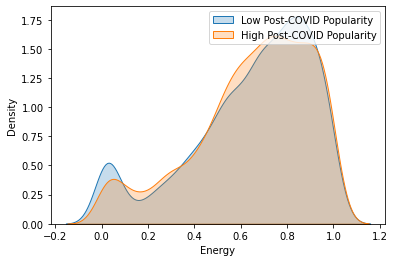

In [ ]:
df_hypot_covid1 = df_recent[["year", "energy", "popularity"]]
# We took the median value for popularity in order to create two equal sized groups
median_pop_covid1 = df_hypot_covid1["popularity"].median()

lower_covid1 = df_hypot_covid1[df_hypot_covid1["popularity"] <= median_pop_covid1]
upper_covid1 = df_hypot_covid1[df_hypot_covid1["popularity"] > median_pop_covid1]

ax = sbr.kdeplot(lower_covid1["energy"].rename("Energy"), shade=True, label="Low Post-COVID Popularity")
sbr.kdeplot(upper_covid1["energy"].rename("Energy"),  ax=ax, shade=True, label="High Post-COVID Popularity")

plt.legend()
plt.show()

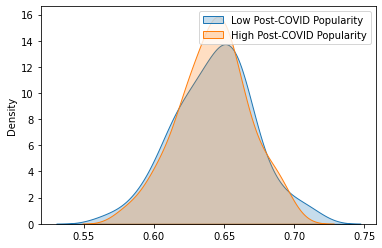

In [ ]:
lower_covid1_clt = lower_covid1.copy()

lower_covid1_list = []

for i in range (0,100):
  lower_covid1_list.append(lower_covid1_clt.sample(100)["energy"].mean())

upper_covid1_clt = upper_covid1.copy()

upper_covid1_list = []

for i in range (0,100):
  upper_covid1_list.append(upper_covid1_clt.sample(100)["energy"].mean())

ax = sbr.kdeplot(lower_covid1_list, shade=True, label="Low Post-COVID Popularity")
sbr.kdeplot(upper_covid1_list,  ax=ax, shade=True, label="High Post-COVID Popularity")

plt.legend()
plt.show()

In [ ]:
significance = 0.05

t, p_value = stats.ttest_ind(a=lower_covid1_list, b=upper_covid1_list, equal_var=False)
print("test statistic: ", format(t,".2E"))
print("P value: ",format(p_value,".2E"))
print("Signifance Level:", significance)
if (p_value < significance):
  print("Based on the current value of p value we reject the null hypothesis, energy effects the popularity of a track released after COVID.")
else:
  print("Based on the current value of p value we fail to reject the null hypothesis, energy does not effect the popularity of a track released after COVID.")

test statistic:  1.33E-01
P value:  8.94E-01
Signifance Level: 0.05
Based on the current value of p value we fail to reject the null hypothesis, energy does not effect the popularity of a track released after COVID.


Contrary to the general data, we have observed that energy has no effect on a track released after COVID.

### Hypothesis 7:

**Null Hypothesis:**

Speechiness does not effect the popularity of a track released after COVID.

**Alternative Hypothesis:**

Speechiness effects the popularity of a track released after COVID.

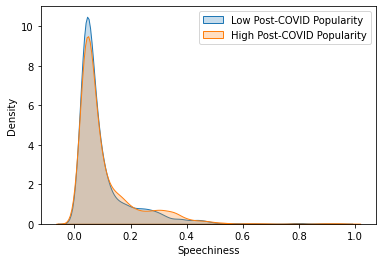

In [ ]:
df_hypot_covid2 = df_recent[["year", "speechiness", "popularity"]]
# We took the median value for popularity in order to create two equal sized groups
median_pop_covid2 = df_hypot_covid2["popularity"].median()

lower_covid2 = df_hypot_covid2[df_hypot_covid2["popularity"] <= median_pop_covid2]
upper_covid2 = df_hypot_covid2[df_hypot_covid2["popularity"] > median_pop_covid2]

ax = sbr.kdeplot(lower_covid2["speechiness"].rename("Speechiness"), shade=True, label="Low Post-COVID Popularity")
sbr.kdeplot(upper_covid2["speechiness"].rename("Speechiness"),  ax=ax, shade=True, label="High Post-COVID Popularity")

plt.legend()
plt.show()

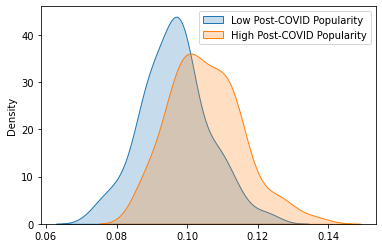

In [ ]:
lower_covid2_clt = lower_covid2.copy()

lower_covid2_list = []

for i in range (0,100):
  lower_covid2_list.append(lower_covid2_clt.sample(100)["speechiness"].mean())

upper_covid2_clt = upper_covid2.copy()

upper_covid2_list = []

for i in range (0,100):
  upper_covid2_list.append(upper_covid2_clt.sample(100)["speechiness"].mean())

ax = sbr.kdeplot(lower_covid2_list, shade=True, label="Low Post-COVID Popularity")
sbr.kdeplot(upper_covid2_list,  ax=ax, shade=True, label="High Post-COVID Popularity")

plt.legend()
plt.show()

In [ ]:
significance = 0.05

t, p_value = stats.ttest_ind(a=lower_covid2_list, b=upper_covid2_list, equal_var=False)
print("test statistic: ", format(t,".2E"))
print("P value: ",format(p_value,".2E"))
print("Signifance Level:", significance)
if (p_value < significance):
  print("Based on the current value of p value we reject the null hypothesis, speechiness effects the popularity of a track released after COVID.")
else:
  print("Based on the current value of p value we fail to reject the null hypothesis, speechiness does not effect the popularity of a track released after COVID.")

test statistic:  -6.21E+00
P value:  3.16E-09
Signifance Level: 0.05
Based on the current value of p value we reject the null hypothesis, speechiness effects the popularity of a track released after COVID.


Based on our findings, we can say that the effect of speechiness on popularity of a track released after COVID is positive. The more lyrical the track is, the more popular it is, implying a positive correlation.

## Statistical tests to check if significant differences exist between different eras

**Testing Method: (for all the hypothesis below)**

First of all, we identified our null and alternative hypothesis. Then, we constructed two new lists for our datasets which we want to examine. we classified "n" as 100 in order to apply Central Limit Theorem. Finally, we calculated our test statistic and p_value to reject or fail to reject the null hypothesis.

### Hypothesis 1:

**Null Hypothesis:**

70's and 2000's pop music are equally danceable.

**Alternative Hypothesis:**

70's and 2000's pop music are not equally danceable.

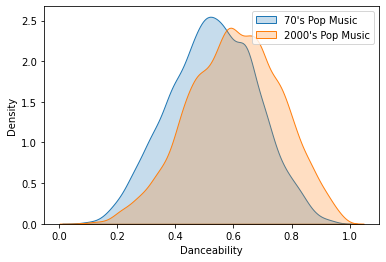

In [ ]:
df_hypot_6 = df_popGenre[["year", "danceability"]]

pop_70s_f = df_hypot_6[df_hypot_6["year"] >= 1970]
pop_70s = pop_70s_f[pop_70s_f["year"] < 1980]
pop_2000s_f = df_hypot_6[df_hypot_6["year"] >= 2000]
pop_2000s = pop_2000s_f[pop_2000s_f["year"] < 2010]

ax = sbr.kdeplot(pop_70s["danceability"].rename("Danceability"), shade=True, label="70's Pop Music")
sbr.kdeplot(pop_2000s["danceability"].rename("Danceability"),  ax=ax, shade=True, label="2000's Pop Music")

plt.legend()
plt.show()

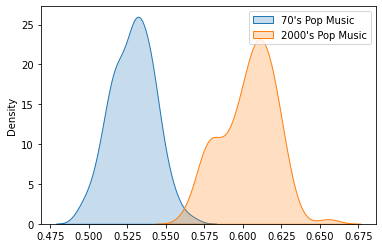

In [ ]:
pop_70s_clt = pop_70s.copy()

list_pop70 = []

for i in range (0,100):
  list_pop70.append(pop_70s_clt.sample(100)["danceability"].mean())

pop_2000s_clt = pop_2000s.copy()

list_pop2000 = []

for i in range (0,100):
  list_pop2000.append(pop_2000s_clt.sample(100)["danceability"].mean())

ax = sbr.kdeplot(list_pop70, shade=True, label="70's Pop Music")
sbr.kdeplot(list_pop2000,  ax=ax, shade=True, label="2000's Pop Music")

plt.legend()
plt.show()

In [ ]:
significance = 0.05

t, p_value = stats.ttest_ind(a=list_pop70, b=list_pop2000, equal_var=False)
print("test statistic: ", format(t,".2E"))
print("P value: ",format(p_value,".2E"))
print("Signifance Level:", significance)
if (p_value < significance):
  print("Based on the current value of p value we reject the null hypothesis, 70's and 2000's pop music are not equally danceable.")
else:
  print("Based on the current value of p value we fail to reject the null hypothesis, 70's and 2000's pop music are equally danceable.")

test statistic:  -3.37E+01
P value:  6.70E-82
Signifance Level: 0.05
Based on the current value of p value we reject the null hypothesis, 70's and 2000's pop music are not equally danceable.


As a result of our test, we have observed that 2000's pop music is more danceable when compared to 70's pop music on average.

### Hypothesis 2:

**Null Hypothesis:**

Instrumentalness is the same among 60's and 2010's jazz.

**Alternative Hypothesis:**

Instrumentalness is not the same among 60's and 2010's jazz.

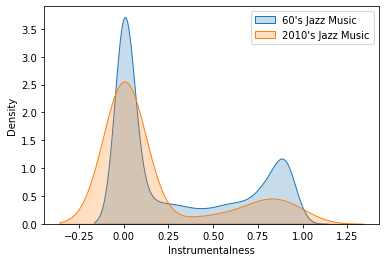

In [ ]:
df_hypot_7 = df_jazzGenre[["year", "instrumentalness"]]

jazz_60s_f = df_hypot_7[df_hypot_7["year"] >= 1960]
jazz_60s = jazz_60s_f[jazz_60s_f["year"] < 1970]
jazz_2010s_f = df_hypot_7[df_hypot_7["year"] >= 2010]
jazz_2010s = jazz_2010s_f[jazz_2010s_f["year"] < 2020]

ax = sbr.kdeplot(jazz_60s["instrumentalness"].rename("Instrumentalness"), shade=True, label="60's Jazz Music")
sbr.kdeplot(jazz_2010s["instrumentalness"].rename("Instrumentalness"),  ax=ax, shade=True, label="2010's Jazz Music")

plt.legend()
plt.show()

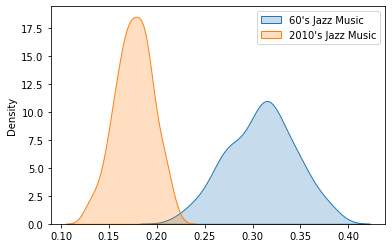

In [ ]:
jazz_60s_clt = jazz_60s.copy()

list_jazz60 = []

for i in range (0,100):
  list_jazz60.append(jazz_60s_clt.sample(100)["instrumentalness"].mean())

jazz_2010s_clt = jazz_2010s.copy()

list_jazz2010 = []

for i in range (0,100):
  list_jazz2010.append(jazz_2010s_clt.sample(100)["instrumentalness"].mean())

ax = sbr.kdeplot(list_jazz60, shade=True, label="60's Jazz Music")
sbr.kdeplot(list_jazz2010,  ax=ax, shade=True, label="2010's Jazz Music")

plt.legend()
plt.show()

In [ ]:
significance = 0.05

t, p_value = stats.ttest_ind(a=list_jazz60, b=list_jazz2010, equal_var=False)
print("test statistic: ", format(t,".2E"))
print("P value: ",format(p_value,".2E"))
print("Signifance Level:", significance)
if (p_value < significance):
  print("Based on the current value of p value we reject the null hypothesis, instrumentalness is not the same among 60's and 2010's jazz.")
else:
  print("Based on the current value of p value we fail to reject the null hypothesis, instrumentalness is the same among 60's and 2010's jazz.")

test statistic:  3.33E+01
P value:  1.78E-72
Signifance Level: 0.05
Based on the current value of p value we reject the null hypothesis, instrumentalness is not the same among 60's and 2010's jazz.


Like all other genres, unfortunately instrumentality decrease after technology exploded. Jazz music also effected from this change, 70's Jazz music is way more instrumental on average when compared to 2000's Jazz music.

### Hypothesis 3:

**Null Hypothesis:**

2000's metal music is as loud as 80's metal music.

**Alternative Hypothesis:**

Loudness is not the same among 2000's metal music compared to 80's metal music.

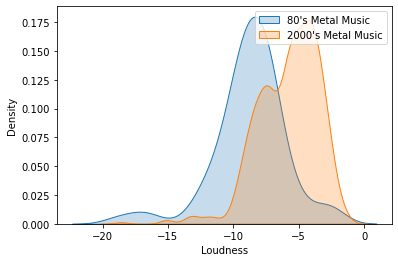

In [ ]:
df_hypot_8 = df_metalGenre[["year", "loudness"]]

metal_80s_f = df_hypot_8[df_hypot_8["year"] >= 1960]
metal_80s = metal_80s_f[metal_80s_f["year"] < 1970]
metal_2000s_f = df_hypot_8[df_hypot_8["year"] >= 2010]
metal_2000s = metal_2000s_f[metal_2000s_f["year"] < 2020]

ax = sbr.kdeplot(metal_80s["loudness"].rename("Loudness"), shade=True, label="80's Metal Music")
sbr.kdeplot(metal_2000s["loudness"].rename("Loudness"),  ax=ax, shade=True, label="2000's Metal Music")

plt.legend()
plt.show()

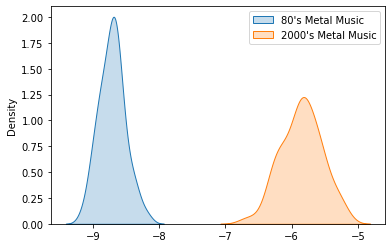

In [ ]:
metal_80s_clt = metal_80s.copy()

list_metal80 = []

for i in range (0,50):
  list_metal80.append(metal_80s_clt.sample(50)["loudness"].mean())

metal_2000s_clt = metal_2000s.copy()

list_metal2000 = []

for i in range (0,50):
  list_metal2000.append(metal_2000s_clt.sample(50)["loudness"].mean())

ax = sbr.kdeplot(list_metal80, shade=True, label="80's Metal Music")
sbr.kdeplot(list_metal2000,  ax=ax, shade=True, label="2000's Metal Music")

plt.legend()
plt.show()

In [ ]:
significance = 0.05

t, p_value = stats.ttest_ind(a=list_metal80, b=list_metal2000, equal_var=False)
print("test statistic: ", format(t,".2E"))
print("P value: ",format(p_value,".2E"))
print("Signifance Level:", significance)
if (p_value < significance):
  print("Based on the current value of p value we reject the null hypothesis, loudness is not the same among 2000's metal music when compared to 80's metal music.")
else:
  print("Based on the current value of p value we fail to reject the null hypothesis, 2000's metal music is as loud as 80's metal music.")

test statistic:  -5.56E+01
P value:  1.47E-67
Signifance Level: 0.05
Based on the current value of p value we reject the null hypothesis, loudness is not the same among 2000's metal music when compared to 80's metal music.


### Hypothesis 4:

**Null Hypothesis:**

60's rock music and 2010's rock music are equally energetic.

**Alternative Hypothesis:**

60's rock music and 2010's rock music are not equally energetic.

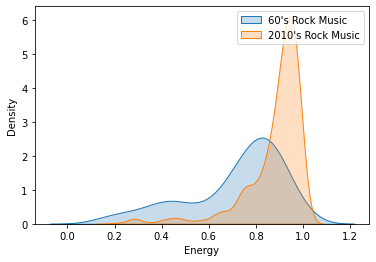

In [ ]:
df_hypot_9 = df_metalGenre[["year", "energy"]]

rock_60s_f = df_hypot_9[df_hypot_9["year"] >= 1960]
rock_60s = rock_60s_f[rock_60s_f["year"] < 1970]
rock_2010s_f = df_hypot_9[df_hypot_9["year"] >= 2010]
rock_2010s = rock_2010s_f[rock_2010s_f["year"] < 2020]

ax = sbr.kdeplot(rock_60s["energy"].rename("Energy"), shade=True, label="60's Rock Music")
sbr.kdeplot(rock_2010s["energy"].rename("Energy"),  ax=ax, shade=True, label="2010's Rock Music")

plt.legend()
plt.show()

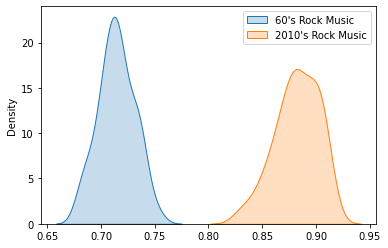

In [ ]:
rock_60s_clt = rock_60s.copy()

list_rock60 = []

for i in range (0,50):
  list_rock60.append(rock_60s_clt.sample(50)["energy"].mean())

rock_2010s_clt = rock_2010s.copy()

list_rock2010 = []

for i in range (0,50):
  list_rock2010.append(rock_2010s_clt.sample(50)["energy"].mean())

ax = sbr.kdeplot(list_rock60, shade=True, label="60's Rock Music")
sbr.kdeplot(list_rock2010,  ax=ax, shade=True, label="2010's Rock Music")

plt.legend()
plt.show()

In [ ]:
significance = 0.05

t, p_value = stats.ttest_ind(a=list_rock60, b=list_rock2010, equal_var=False)
print("test statistic: ", format(t,".2E"))
print("P value: ",format(p_value,".2E"))
print("Signifance Level:", significance)
if (p_value < significance):
  print("Based on the current value of p value we reject the null hypothesis, 60's rock music and 2010's rock music are not equally energetic.")
else:
  print("Based on the current value of p value we fail to reject the null hypothesis, 60's rock music and 2010's rock music are equally energetic.")

test statistic:  -4.54E+01
P value:  5.93E-66
Signifance Level: 0.05
Based on the current value of p value we reject the null hypothesis, 60's rock music and 2010's rock music are not equally energetic.


We can say that 2010's Rock music is more energetic when compared to 60's Rock music as a result of our findings.

### Hypothesis 5:

**Null Hypothesis:**

90's rap songs and 2010's rap songs are equally lyrical on average.

**Alternative Method:**

90's rap songs and 2010's rap songs are not equally lyrical on average.

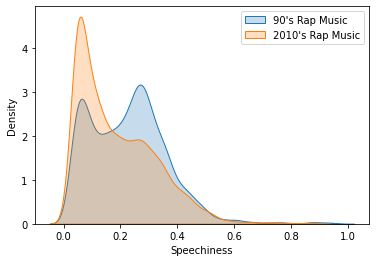

In [ ]:
df_hypot_10 = df_rapGenre[["year", "speechiness"]]

rap_90s_f = df_hypot_10[df_hypot_10["year"] >= 1990]
rap_90s = rap_90s_f[rap_90s_f["year"] < 2000]
rap_2010s_f = df_hypot_10[df_hypot_10["year"] >= 2010]
rap_2010s = rap_2010s_f[rap_2010s_f["year"] < 2020]

ax = sbr.kdeplot(rap_90s["speechiness"].rename("Speechiness"), shade=True, label="90's Rap Music")
sbr.kdeplot(rap_2010s["speechiness"].rename("Speechiness"),  ax=ax, shade=True, label="2010's Rap Music")

plt.legend()
plt.show()

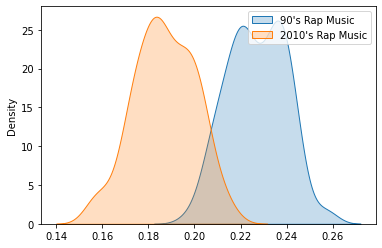

In [ ]:
rap_90s_clt = rap_90s.copy()

list_rap90 = []

for i in range (0,100):
  list_rap90.append(rap_90s_clt.sample(100)["speechiness"].mean())

rap_2010s_clt = rap_2010s.copy()

list_rap2010 = []

for i in range (0,100):
  list_rap2010.append(rap_2010s_clt.sample(100)["speechiness"].mean())

ax = sbr.kdeplot(list_rap90, shade=True, label="90's Rap Music")
sbr.kdeplot(list_rap2010,  ax=ax, shade=True, label="2010's Rap Music")

plt.legend()
plt.show()

In [ ]:
significance = 0.05

t, p_value = stats.ttest_ind(a=list_rap90, b=list_rap2010, equal_var=False)
print("test statistic: ", format(t,".2E"))
print("P value: ",format(p_value,".2E"))
print("Signifance Level:", significance)
if (p_value < significance):
  print("Based on the current value of p value we reject the null hypothesis, 90's rap songs and 2010's rap songs are not equally lyrical on average.")
else:
  print("Based on the current value of p value we fail to reject the null hypothesis, 90's rap songs and 2010's rap songs are equally lyrical on average.")

test statistic:  2.19E+01
P value:  7.91E-55
Signifance Level: 0.05
Based on the current value of p value we reject the null hypothesis, 90's rap songs and 2010's rap songs are not equally lyrical on average.


In light of our findings, we can comment that 90's rap music is more lyrical on average when compared to 2010's rap music.

# Machine Learning

## Linear Regression Models Predicting Popularity of a Song

In [ ]:
from sklearn.model_selection import train_test_split as testData
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

def LinReg (df_test,col_1,col_2,sample_num):
  linearreg = linear_model.LinearRegression()

  X = df_test.iloc[:,col_1].sample(sample_num)
  X = X.values.reshape(-1, 1) 
  y = df_test.iloc[:,col_2].sample(sample_num)
  y = y.values.reshape(-1, 1)

  # Split X and y into training and test data
  X_train, X_test, y_train, y_test = testData(X, y, test_size=0.35, random_state=1)

  linearreg.fit(X_train, y_train)
  print("L score is :" ,format(linearreg.score(X_test, y_test),".2E"))
  y_predict = linearreg.predict(X_test)

  linearreg_mse = mean_squared_error(y_predict, y_test)
  print("Mean Square Error is " ,format(linearreg_mse,".2E"))

  df_result= pd.DataFrame(data={ 'Test Data for X': X_test.flatten(),'Actual Data for y': y_test.flatten(),'y_predict': y_predict.flatten() })
  sbr.scatterplot(x="Test Data for X", y="Actual Data for y", data=df_result)
  sbr.lineplot(x="Test Data for X", y="y_predict", data=df_result,color ="green", label = "Linear Regression Prediction Model",linewidth=7)

  title_1 = df.iloc[:,col_1].name.capitalize()
  title_2 = df.iloc[:,col_2].name.capitalize()
  title_total = str(title_1) + " vs " + str(title_2)

  plt.title(title_total)
  plt.show()

L score is : -1.77E-02
Mean Square Error is  5.73E+02


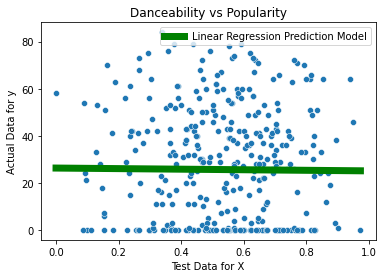

In [ ]:
#Danceability vs Popularity
LinReg (df, 2, 13, 1000)

L score is : 5.09E-03
Mean Square Error is  4.56E+02


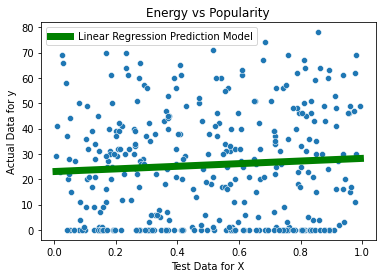

In [ ]:
#Energy vs Popularity
LinReg(df, 4, 13, 1000)

L score is : -1.08E-02
Mean Square Error is  4.47E+02


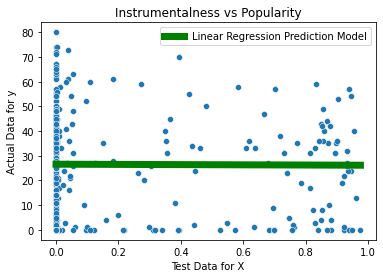

In [ ]:
#Instrumentalness vs Popularity
LinReg(df, 7, 13, 1000)

L score is : -4.22E-03
Mean Square Error is  5.27E+02


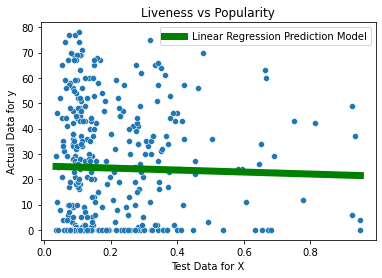

In [ ]:
#Liveness vs Popularity
LinReg(df, 9, 13, 1000)

L score is : -6.39E-04
Mean Square Error is  4.92E+02


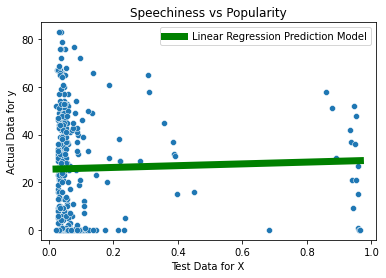

In [ ]:
#Speechiness vs Popularity
LinReg(df, 15, 13, 1000)

L score is : 2.21E-03
Mean Square Error is  8.25E+02


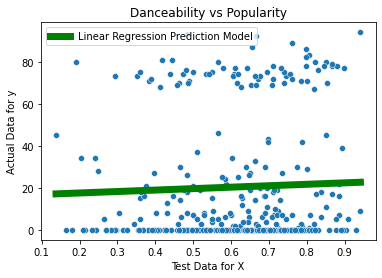

In [ ]:
#Danceability vs Popularity in COVID-19 data.
LinReg (df_recent, 2, 13, 1000)

L score is : -1.23E-03
Mean Square Error is  7.65E+02


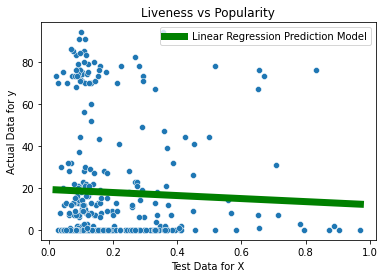

In [ ]:
#Liveness vs Popularity in COVID-19 data.
LinReg (df_recent, 9, 13, 1000)

## Efforts on Hyper-parameter Tuning to Increase the Effectiveness

### Preprocessing

In [ ]:
df_preprod = df.copy()
df_preprod = df_preprod.drop(["explicit","id","mode","release_date","artists","name"],axis=1)

# Normalizing extreme parameters for optimization
def normalize(col):
  df_preprod[col] = (df_preprod[col] - df_preprod[col].mean()) / df_preprod[col].std()
normalize("tempo")
normalize("loudness")

# Converting milli seconds into minutes
df_preprod["duration_ms"] = df_preprod["duration_ms"] / 60000
df_preprod = df_preprod.rename({'duration_ms' : 'duration_m'}, axis = 1)

df_preprod.head()

acousticness  danceability  duration_m  ...     tempo  valence  year
0      0.991000         0.598    2.805550  ...  1.089750   0.6340  1920
1      0.643000         0.852    2.503333  ... -0.995482   0.9500  1920
2      0.993000         0.647    2.730450  ... -0.641449   0.6890  1920
3      0.000173         0.730    7.034783  ...  0.363272   0.0422  1920
4      0.295000         0.704    2.753733  ...  0.167564   0.2990  1920

[5 rows x 13 columns]

### Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
df_preprodFinal = df_preprod.sample(50000)

# features to be compared with popularity
X = df_preprodFinal.drop("popularity", axis=1)
# our target attribute as popularity
y = df_preprodFinal["popularity"]

# Using 80-10-10 Training-Validation-Test Split Method
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, random_state = 42, test_size=0.20)
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, random_state = 42, test_size=0.50)

# Initialize model, train, and predict
rf = RandomForestClassifier(criterion = 'entropy')
rf.fit(X_train, y_train)
y_preds = rf.predict(X_val)
print ("The accuracy score for the random forest model is: " + str(accuracy_score(y_val, y_preds)))

The accuracy score for the random forest model is: 0.2656


In [ ]:
from matplotlib import cm

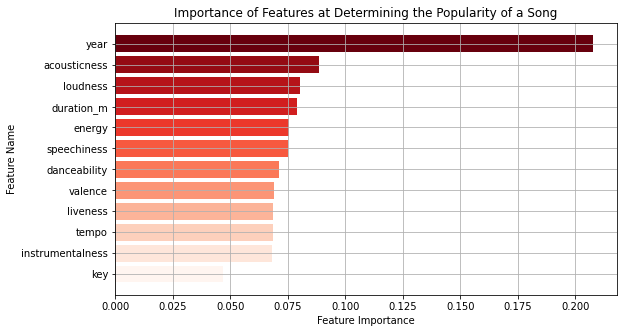

In [ ]:
# Creating feature name, feature importance pairs and sorting them in descending order
feature_importances = list(zip(X.columns, rf.feature_importances_))

fig, ax = plt.subplots(figsize = (9, 5))
cmapx = plt.cm.Reds(np.linspace(0,1,len(sorted)))
ax.barh([tup[0] for tup in sorted], [tup[1] for tup in sorted], color = cmapx)
ax.set_xlabel('Feature Importance')
ax.set_ylabel('Feature Name')

plt.title('Importance of Features at Determining the Popularity of a Song')
plt.grid()
plt.savefig('featureimps.png')
plt.show()

As we were expecting, year became the most important factor at determining the popularity of a song, generally latest songs becoming the most popular ones. Apart from the year, the most important feature of a song determining the popularity became acousticness, being followed by loudness, duration and energy.

### Decision Tree Model

In [ ]:
# cross validating the data
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion="entropy")
accuracies = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")

# taking the mean accuracy as our general accuracy for this model
print("The accuracy score for the decision tree model is: {:.2f} (+/- {:.2f})".format(accuracies.mean(), accuracies.std() * 2))

The accuracy score for the decision tree model is: 0.20 (+/- 0.01)


In [ ]:
# checking hyper-parameters
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

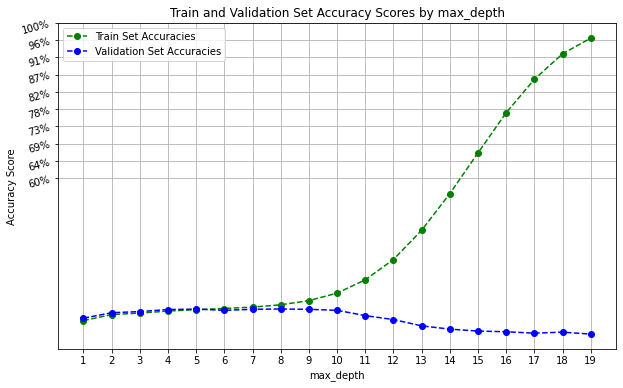

In [ ]:
max_depth_values = np.arange(1, 20)

train_set_accuracies = []
val_set_accuracies = []

for depth in max_depth_values:
  model = DecisionTreeClassifier(criterion="entropy", max_depth=depth)
  model.fit(X_train, y_train)
  train_preds = model.predict(X_train)
  val_preds = model.predict(X_val)
  train_set_accuracies.append(accuracy_score(y_train, train_preds))
  val_set_accuracies.append(accuracy_score(y_val, val_preds))

fig, ax = plt.subplots(figsize = (10, 6))

# the label/tick locations
x_ticks = np.arange(len(max_depth_values))
# yloc between 0.6-1
y_ticks = np.linspace(.6, 1.0, 10)
y_labels = [f"{val*100:.0f}%" for val in y_ticks]

ax.plot(train_set_accuracies, "go--", label = "Train Set Accuracies")
ax.plot(val_set_accuracies, "bo--", label = "Validation Set Accuracies")

ax.set_ylabel("Accuracy Score")
ax.set_xlabel("max_depth")
ax.set_title("Train and Validation Set Accuracy Scores by max_depth")
ax.set_xticks(x_ticks)
ax.set_xticklabels(max_depth_values)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.legend()

plt.yticks(rotation = 15)
plt.grid()
plt.show()

We noticed overfitting as the max_depht increases, indicating that our model gives a better accuracy in the training data while performs not so well for validation data. 

In [ ]:
from sklearn.tree import export_text

# as our decision tree is very crowded, we could only put the text version of it in our project
print(export_text(model, feature_names=list(X.columns)))

|--- year <= 1955.50
|   |--- year <= 1948.50
|   |   |--- speechiness <= 0.67
|   |   |   |--- acousticness <= 0.98
|   |   |   |   |--- duration_m <= 3.37
|   |   |   |   |   |--- year <= 1940.50
|   |   |   |   |   |   |--- year <= 1932.50
|   |   |   |   |   |   |   |--- instrumentalness <= 0.00
|   |   |   |   |   |   |   |   |--- loudness <= 0.54
|   |   |   |   |   |   |   |   |   |--- duration_m <= 3.13
|   |   |   |   |   |   |   |   |   |   |--- duration_m <= 2.62
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- duration_m >  2.62
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |--- duration_m >  3.13
|   |   |   |   |   |   |   |   |   |   |--- duration_m <= 3.18
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- duration_m >  3.18
|   |   |   |   |   |   |   |   |   | 

As a result of our models on the data, we have seen that Random Forest model worked with better accuracy on our data, concluding our evaluation for this part.

## Creating a Simple Song Recommendation System

In [ ]:
df_predict = df_preprod.copy()
df_predict['songName'] = df['name']
df_predict = df_predict.drop(['key'], axis=1)
# displaying the data frame in which we will work on
df_predict.head()

acousticness  ...                                           songName
0      0.991000  ...                           Keep A Song In Your Soul
1      0.643000  ...                               I Put A Spell On You
2      0.993000  ...                                       Golfing Papa
3      0.000173  ...  True House Music - Xavier Santos & Carlos Gomi...
4      0.295000  ...                                          Xuniverxe

[5 rows x 13 columns]

In [ ]:
from collections import Counter
import math

def knn(data, query, k, distance_fn, choice_fn):
    neighbor_distances_and_indices = []
    
    for index, example in enumerate(data):
        distance = distance_fn(example[:-1], query)
        neighbor_distances_and_indices.append((distance, index))

    sorted_neighbor_distances_and_indices = sorted(neighbor_distances_and_indices)

    k_nearest_distances_and_indices = sorted_neighbor_distances_and_indices[:k]
    k_nearest_labels = [data[i][-1] for distance, i in k_nearest_distances_and_indices]

    #If regression (choice_fn = mean), return the average of the K labels
    #If classification (choice_fn = mode), return the mode of the K labels
    return k_nearest_distances_and_indices , choice_fn(k_nearest_labels)

def mean(labels):
    return sum(labels) / len(labels)

def mode(labels):
    return Counter(labels).most_common(1)[0][0]

def euclidean_distance(point1, point2):
    sum_squared_distance = 0
    for i in range(len(point1)):
        sum_squared_distance += math.pow(point1[i] - point2[i], 2)
    return math.sqrt(sum_squared_distance)

In [ ]:
def recommend_songs(song_query, k_recommendations):
    df_new = df_predict.copy()
    df_new = df_new.to_numpy()
    df_new = df_new.tolist()

    songs_recommendation_data = []
    for row in df_new:
        data_row = list(map(float, row[:-1]))
        songs_recommendation_data.append(data_row)

    # Use the KNN algorithm to get the 3 songs that are most
    # similar to the entered songs.
    recommendation_indices, _ = knn(
        songs_recommendation_data, song_query, k=k_recommendations,
        distance_fn=euclidean_distance, choice_fn=lambda x: None
    )

    recommended_songs = []
    for _, index in recommendation_indices:
        recommended_songs.append(df_predict.iloc[index])

    return recommended_songs

if __name__ == '__main__':
    song_Name = input("Please enter a list of songs: ")
    song_Name = song_Name.split(", ")

    for song in song_Name:
      index = df_predict.index
      condition = df_predict['songName'] == song
      find_song = index[condition]
      selected_song = df_predict.iloc[find_song]
      selected_song = selected_song.drop(['songName'], axis=1)
      selected_song = selected_song.values.tolist()
      recommended_songs = recommend_songs(song_query=selected_song[0], k_recommendations=4)

    # Print recommended songs
      for recommendation in recommended_songs:
          if (str(recommendation[-1]) != str(song)):
            print("The system found the similar song named: " + str(recommendation[-1]) + " similar to the song: " + str(song))


Please enter a list of songs: One Dance, drivers license, Rock That Body, The Real Slim Shady
The system found the similar song named: forget me too (feat. Halsey) similar to the song: One Dance
The system found the similar song named: Like That (feat. Gucci Mane) similar to the song: One Dance
The system found the similar song named: Know Your Worth similar to the song: One Dance
The system found the similar song named: positions similar to the song: drivers license
The system found the similar song named: Mood (feat. iann dior) similar to the song: drivers license
The system found the similar song named: DÁKITI similar to the song: drivers license
The system found the similar song named: El Doctorado similar to the song: Rock That Body
The system found the similar song named: The Only Way Is Up similar to the song: Rock That Body
The system found the similar song named: *〜アスタリスク〜 similar to the song: Rock That Body
The system found the similar song named: China similar to the song: T